# Projet Python pour le data scientist : Prévision des prix des Airbnb
#### Réalisé par M.Blazevic, E.Bordais, C.Nadler, C.Voisin

## 0. Import modules et base de données

In [1]:
%pip install shap
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from string import ascii_letters
import itertools
import collections
import nltk
from nltk.corpus import stopwords 
import warnings
import geopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import sklearn
import pickle
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
import shap
import plotly.express as px
import geopandas as gpd 


%matplotlib inline


ModuleNotFoundError: No module named 'xgboost'

In [13]:

data = pd.read_csv('airbnb-listings3.csv' , sep=';', low_memory= False)
data

ID                            Listing Url       Scrape ID  \
0       7713011   https://www.airbnb.com/rooms/7713011  20170404145355   
1       3335054   https://www.airbnb.com/rooms/3335054  20170404145355   
2      10066518  https://www.airbnb.com/rooms/10066518  20170404145355   
3       8100080   https://www.airbnb.com/rooms/8100080  20170404145355   
4       7397323   https://www.airbnb.com/rooms/7397323  20170404145355   
...         ...                                    ...             ...   
54508   2610162   https://www.airbnb.com/rooms/2610162  20170404145355   
54509  13760682  https://www.airbnb.com/rooms/13760682  20170404145355   
54510   9173969   https://www.airbnb.com/rooms/9173969  20170404145355   
54511  13754942  https://www.airbnb.com/rooms/13754942  20170404145355   
54512   8642835   https://www.airbnb.com/rooms/8642835  20170404145355   

      Last Scraped                                          Name  \
0       2017-04-06                      STUDIO PIGALLE W BALCONY   
1       2017-04-05           Montmartre au pied du Sacré-Coeur !   
2       2017-04-06            LOVELY FLAT MONTMARTRE SACRE COEUR   
3       2017-04-06             Appartement au pied de Montmartre   
4       2017-04-06                 Beautiful and Spacious Studio   
...            ...                                           ...   
54508   2017-04-06           Rue Cler at 500m from Eiffel Tower!   
54509   2017-04-06  Elegant 160m Home in the heart of St Germain   
54510   2017-04-06                 partner service test listing3   
54511   2017-04-06       2 bedroom appartement in a premium area   
54512   2017-04-06           Spacious Room in Charming Apartment   

                                                 Summary  \
0      In the heart of Montmarte Pigalle, this lovely...   
1      Ce studio de 22m2, rénové et équipé avec soin,...   
2      In 2' by walk of the Sacré-Coeur and the Mouli...   
3      Dans un appartement de 50m², à deux minutes du...   
4      Grd studio lumineux de 32m² avec une grande pi...   
...                                                  ...   
54508  Logement très calme, ensoleillé, situé derrièr...   
54509  Our home is in the heart to Saint-Germain-des-...   
54510                             this is a test summary   
54511  Situated in a prestigious area near the Rodin ...   
54512  Spacious bedroom in a beautifully authentic th...   

                                                   Space  \
0      This newly refurbished flat is ideal for a cou...   
1      A studio where it is very pleasant to settle i...   
2      Charmant appartement typiquement parisien avec...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
54508  Ce logement se trouve au 2e étage et comporte ...   
54509  Our home is a large (160m) classic French apar...   
54510                                                NaN   
54511                                                NaN   
54512  A classic turn of the century apartment in the...   

                                             Description Experiences Offered  \
0      In the heart of Montmarte Pigalle, this lovely...                none   
1      A studio where it is very pleasant to settle i...                none   
2      In 2' by walk of the Sacré-Coeur and the Mouli...                none   
3      Dans un appartement de 50m², à deux minutes du...                none   
4      Grd studio lumineux de 32m² avec une grande pi...                none   
...                                                  ...                 ...   
54508  Logement très calme, ensoleillé, situé derrièr...                none   
54509  Our home is in the heart to Saint-Germain-des-...                none   
54510                             this is a test summary                none   
54511  Situated in a prestigious area near the Rodin ...         

On supprime les features qui ne sont pas utiles

In [14]:
df = data.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Summary', 
              'Experiences Offered', 'Thumbnail Url', 'House Rules', 'Medium Url',
              'Picture Url', 'XL Picture Url', 'Host URL', 'Host Location', 
              'Host About', 'Host Acceptance Rate', 'Host Thumbnail Url', 
              'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count',
               'Host Verifications','Neighbourhood Group Cleansed', 'State', 
                'Market', 'Smart Location', 'Country Code', 'Country', 
               'Calendar last Scraped', 'First Review', 'Last Review', 
                'Jurisdiction Names', 'Features', 'License', 'Interaction', 'Host Name',
                'Monthly Price', 'Weekly Price'
               ], axis=1)

In [5]:
df.head()

Name  \
0             STUDIO PIGALLE W BALCONY   
1  Montmartre au pied du Sacré-Coeur !   
2   LOVELY FLAT MONTMARTRE SACRE COEUR   
3    Appartement au pied de Montmartre   
4        Beautiful and Spacious Studio   

                                               Space  \
0  This newly refurbished flat is ideal for a cou...   
1  A studio where it is very pleasant to settle i...   
2  Charmant appartement typiquement parisien avec...   
3                                                NaN   
4                                                NaN   

                                         Description  \
0  In the heart of Montmarte Pigalle, this lovely...   
1  A studio where it is very pleasant to settle i...   
2  In 2' by walk of the Sacré-Coeur and the Mouli...   
3  Dans un appartement de 50m², à deux minutes du...   
4  Grd studio lumineux de 32m² avec une grande pi...   

                               Neighborhood Overview  \
0  It is central enough for you to walk your way ...   
1  The apartment is located rue d'Orsel just belo...   
2  Situé en plein quartier Montmartre, vous serez...   
3                                                NaN   
4                                                NaN   

                                               Notes  \
0  Real globetrotters, we are real Parisians with...   
1  The building has a digital code and intercom. ...   
2  Situé en plein quartier Montmartre, vous serez...   
3                                                NaN   
4                                                NaN   

                                             Transit  \
0  The flat is ideally located in Montmartre Piga...   
1  The studio is easily accessible. At the foot o...   
2  Très bien desservi par les transports en commu...   
3                                                NaN   
4                                                NaN   

                                              Access   Host ID  Host Since  \
0  Subway stations: Abbesses or Pigalle. Bus, Tax...  32492446  2015-05-03   
1  The kitchen is equipped with a refrigerator, t...   2726446  2012-06-24   
2                                                NaN  30432969  2015-04-01   
3                                                NaN  42773335  2015-08-28   
4                                                NaN  38757332  2015-07-17   

   Host Response Time  ...  Review Scores Accuracy  Review Scores Cleanliness  \
0      within an hour  ...                     9.0                        9.0   
1                 NaN  ...                    10.0                       10.0   
2  within a few hours  ...                    10.0                       10.0   
3  within a few hours  ...                    10.0                       10.0   
4      within an hour  ...                    10.0                        9.0   

  Review Scores Checkin Review Scores Communication Review Scores Location  \
0                   9.0                         9.0                    8.0   
1                  10.0                        10.0                   10.0   
2                  10.0                        10.0                   10.0   
3                  10.0                        10.0                   10.0   
4                   9.0                        10.0                    8.0   

  Review Scores Value Cancellation Policy  Calculated host listings count  \
0                 9.0              strict                               7   
1                10.0            moderate                               1   
2                10.0            moderate                               2   
3                 9.0            flexible                               1   
4                10.0            flexible                               1   

   Reviews per Month                            Geolocation  
0               1.84   48.88292573377615,2.3358125139068453  
1               0.03    48.88301302713629,2.343468625865973  
2               0.89  

On a donc maintenant 55 features

In [6]:
df.columns

Index(['Name', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Host ID', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Total Listings Count', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count',

## 1. Statistiques descriptives de la base de données 

### 1.0 Premières statistiques

In [15]:
#On abandonne les colonnes où les prix sont nuls pour éviter de fausser l'analyse
df=df[df['Price']!=0]

In [8]:
df['Price'].describe()

count    54458.000000
mean        94.789159
std         73.357259
min          8.000000
25%         55.000000
50%         75.000000
75%        107.000000
max        999.000000
Name: Price, dtype: float64

On remarque que le prix moyen par nuit est de 94€, avec un prix minimal de 8€, qui paraît assez incohérent avec les tarifs habituels.

Traçons la répartition des prix des Airbnb parisiens

Text(0, 0.5, 'Quantité')

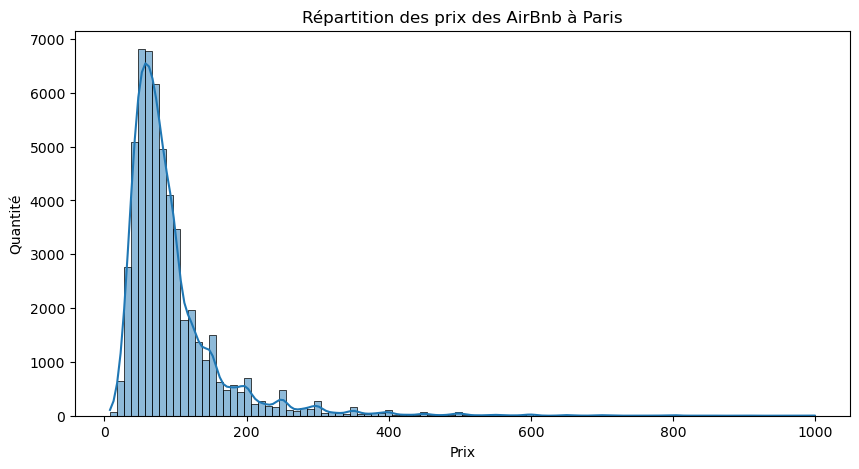

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df['Price'], kde=True, bins=int(100))
plt.title ('Répartition des prix des AirBnb à Paris')
plt.xlabel('Prix')
plt.ylabel('Quantité')

In [10]:
#Pourcentage des airbnb ayant un prix inférieur à 200€
len(df.loc[df['Price']<200])/len(df) * 100

93.09142941003815

On observe que la plus grande partie (environ 93%) des AirBnb ont un prix inférieur à 200€ par nuit.  Traçons désormais les distributions de prix en dessous et au dessus de ce seuil. 

Text(0.5, 1.0, 'Distribution des prix supérieurs à 200 euros')

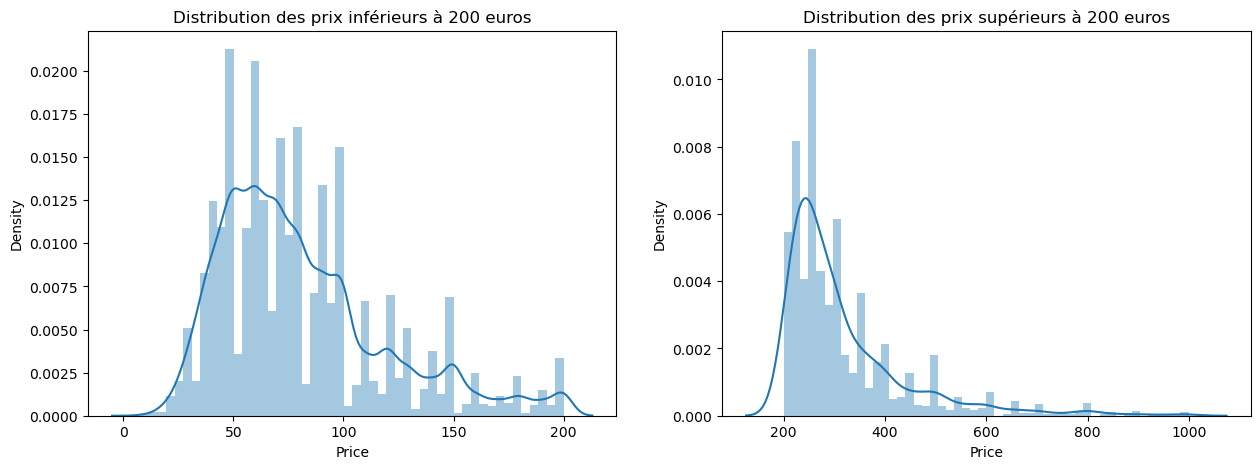

In [11]:
warnings.simplefilter('ignore')

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

ax0 = sns.distplot(df[df['Price'] <= 200]['Price'], ax=axs[0])
ax0.set_title('Distribution des prix inférieurs à 200 euros')

ax1 = sns.distplot(df[df['Price'] > 200]['Price'], ax=axs[1])
ax1.set_title('Distribution des prix supérieurs à 200 euros')

Qu'est ce qui influence le plus le prix d'un Airbnb ? 
Nous avons naturellement pensé à plusieurs axes tels que : 
- sa taille : nombre de chambres, de personnes qu'il peut accueillir, superficie
- sa localisation : quartier 
- qualité de l'hébergement : matériel et services disponibles
- qualité de l'hôte


##### Quelles sont les variables les plus corrélées au prix ?

In [12]:
#on ne garde que les variables numériques
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Host ID  Host Response Rate  Host Total Listings Count   Latitude  \
0  32492446               100.0                        7.0  48.882926   
1   2726446                 NaN                        1.0  48.883013   
2  30432969                95.0                        2.0  48.884043   
3  42773335               100.0                        1.0  48.885195   
4  38757332               100.0                        1.0  48.894800   

   Longitude  Accommodates  Bathrooms  Bedrooms  Beds  Square Feet  ...  \
0   2.335813             2        1.0       0.0   1.0          NaN  ...   
1   2.343469             2        1.0       0.0   1.0          NaN  ...   
2   2.340604             2        1.0       1.0   1.0          NaN  ...   
3   2.345101             2        1.0       1.0   1.0          NaN  ...   
4   2.330055             2        1.0       0.0   1.0          NaN  ...   

   Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
0                 37                  85.0                     9.0   
1                  1                 100.0                    10.0   
2                 13                  97.0                    10.0   
3                  3                  87.0                    10.0   
4                  2                  90.0                    10.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        9.0                    9.0   
1                       10.0                   10.0   
2                       10.0                   10.0   
3                       10.0                   10.0   
4                        9.0                    9.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                          9.0                     8.0                  9.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                         10.0                    10.0                  9.0   
4                         10.0                     8.0                 10.0   

   Calculated host listings count  Reviews per Month  
0                               7               1.84  
1                               1               0.03  
2                               2               0.89  
3                               1               0.17  
4                               1               0.11  

[5 rows x 32 columns]

<AxesSubplot:>

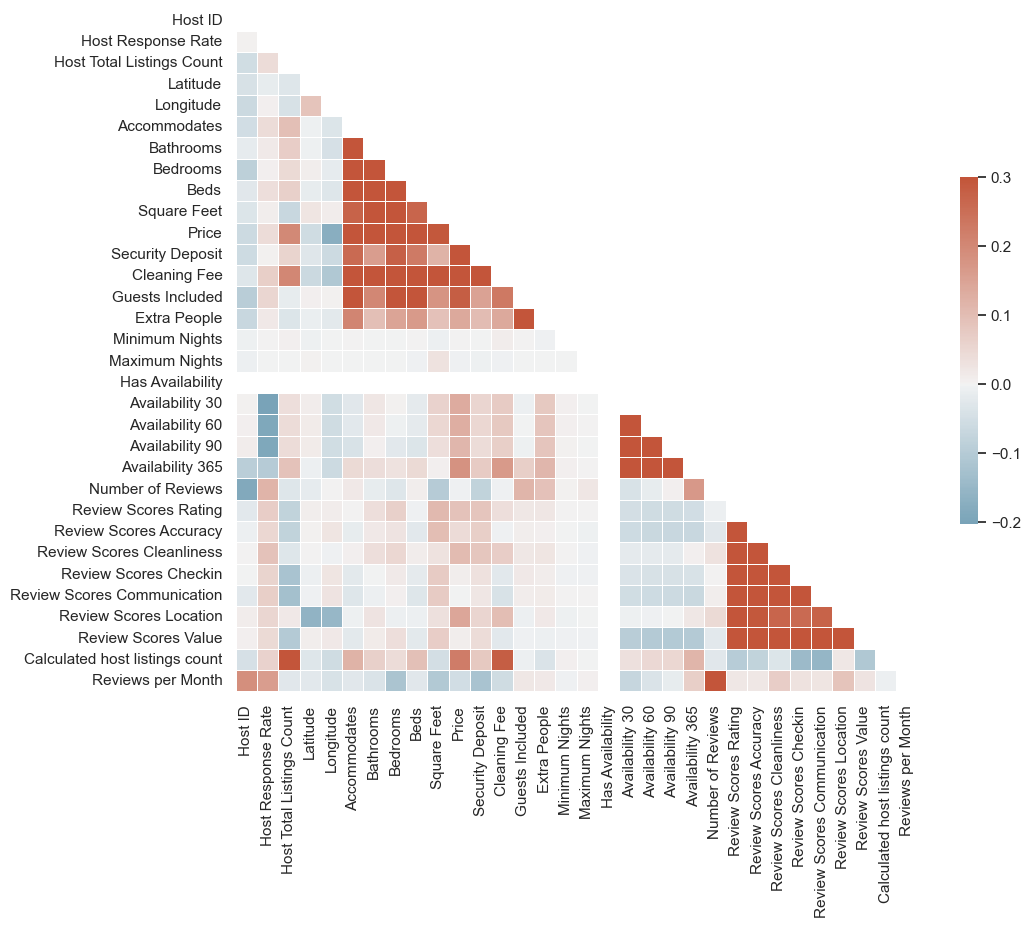

In [13]:
sns.set_theme(style="white")

# Matrice de corrélation
corr = df_num.corr()

# Génération d'un masque pour la partie supérieure du triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mise en place de la figure
f, ax = plt.subplots(figsize=(11, 9))

# Création d'une palette de couleurs
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Tracé de la heatmap avec le masque et les bonnes dimensions
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
#Variables numériques les plus corrélées avec le prix

var_corr = df_num.corr()['Price']
var = var_corr[abs(var_corr) > 0.2].sort_values(ascending=False)
print("Voici les {} variables les plus fortement corrélées avec le prix par nuit (en ignorant la variable 'Price'):\n{}".format(len(var), var))

Voici les 10 variables les plus fortement corrélées avec le prix par nuit (en ignorant la variable 'Price'):
Price                             1.000000
Cleaning Fee                      0.606410
Accommodates                      0.578680
Bedrooms                          0.548549
Beds                              0.506751
Bathrooms                         0.465715
Security Deposit                  0.375173
Square Feet                       0.293823
Guests Included                   0.281018
Calculated host listings count    0.222991
Name: Price, dtype: float64


Ainsi, les variables les plus corrélées au prix sont les frais de nettoyage, la capacité d'accueil, le nombre de chambres, de lits et de salles de bain, la caution, la superficie de l'appartement, le nombre d'invités inclus dans l'annonce de base, le nombre d'annonces de l'hôte, ainsi que l'arrondissement.

### 1.1 Influence de la localisation

In [15]:
df.columns

Index(['Name', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Host ID', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Total Listings Count', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count',

Après une rapide analyse, on se rend compte que la variable Neighbourhood Cleansed est moins précise que Neighbourhood
(20 valeurs contre 64) mais elle semble éliminer certaines erreurs et doublons (par exemple, le quartier Cannesqui qui n'existe pas, le 15ème arrondissement qui groupe avec d'autre quartiers...). On utilisera donc cette variable là. 

In [16]:
df['Neighbourhood Cleansed'].describe()

count                 54512
unique                   20
top       Buttes-Montmartre
freq                   6315
Name: Neighbourhood Cleansed, dtype: object

In [17]:
#On produit un tableau qui indique le nombre et le prix moyen des Airbnb par quartier
df_nb = df.groupby('Neighbourhood Cleansed').agg({'Neighbourhood Cleansed':'count', 'Price':'mean'})
df_nb.columns = ['count', 'mean_price']
df_nb.reset_index(inplace=True)
df_nb.sort_values('count', ascending=False, ignore_index=True, inplace=True)

In [18]:
df_nb

Neighbourhood Cleansed  count  mean_price
0       Buttes-Montmartre   6315   74.813243
1              Popincourt   5381   79.487546
2               Vaugirard   4000   90.633567
3                Entrepôt   3749   82.779616
4     Batignolles-Monceau   3547   88.391819
5            Ménilmontant   2981   65.175444
6         Buttes-Chaumont   2951   66.420285
7                   Passy   2895  123.859570
8                   Opéra   2391   98.421757
9                  Temple   2368  120.041807
10           Observatoire   2161   80.929434
11                Reuilly   2156   77.828770
12               Panthéon   1989  109.756036
13               Gobelins   1940   72.221764
14         Hôtel-de-Ville   1927  131.277778
15             Luxembourg   1846  142.119913
16         Palais-Bourbon   1708  138.534311
17                 Bourse   1620  111.389988
18                 Élysée   1459  152.751381
19                 Louvre   1128  139.022183

On s'aperçoit donc que les prix varient fortement entre les différents quartiers de Paris. On s'intéresse désormais au prix par arrondissement, pour ensuite faire de la visualisation sur carte. 

In [19]:
#Toutes les valeurs prises par la variable Zipcode
df['Zipcode'].unique()

array(['75018', '75004', '75003', '75017', nan, '75019', '75020', '75007',
       '75015', '75006', '75010', '75009', '93300', '75012', '75011',
       '75008', '75013', '75005', '75002', '75001', '75014', '75116',
       '75016', '750018', '92130', '75', '75011\r\n75011', 'Paris 75004',
       '92300', '75000', '94250', '94160', '76016', '75011 PARIS',
       '92100', '750109', '7015', '92240', '92200', 'adf', 'Paris',
       '700014', '75 018', '93310', '75014\r\n75014', 'Montmartre',
       '750016', '075016', '93170', '75003\r\n75003', '78005', '78008',
       '75018e', '75106', '92170'], dtype=object)

On remarque que il y a beaucoup d'imperfections sur cette variable, il faut donc la nettoyer : 
- enlever les Airbnb situés en banlieue (zipcode commencant par 92, 94, ...) 
- regrouper les 75018.0 et 75018 

In [16]:
#on créé la variable arrondissement, on lui donne la valeur 0 par défaut
df['Arrondissement']=0

In [17]:
#on attribue la bonne valeur à la variable arrondissement

df.loc[df["Zipcode"]=="75001", "Arrondissement"] = 1
df.loc[df["Zipcode"]=="75001.0", "Arrondissement"] = 1
df.loc[df["Zipcode"]=="75002", "Arrondissement"] = 2
df.loc[df["Zipcode"]=="75002.0", "Arrondissement"] = 1
df.loc[df["Zipcode"]=="75003", "Arrondissement"] = 3
df.loc[df["Zipcode"]=="75003.0", "Arrondissement"] = 3
df.loc[df["Zipcode"]=="75004", "Arrondissement"] = 4
df.loc[df["Zipcode"]=="75004.0", "Arrondissement"] = 4
df.loc[df["Zipcode"]=="75005", "Arrondissement"] = 5
df.loc[df["Zipcode"]=="75005.0", "Arrondissement"] = 5
df.loc[df["Zipcode"]=="75006", "Arrondissement"] = 6
df.loc[df["Zipcode"]=="75006.0", "Arrondissement"] = 6
df.loc[df["Zipcode"]=="75007", "Arrondissement"] = 7
df.loc[df["Zipcode"]=="75007.0", "Arrondissement"] = 7
df.loc[df["Zipcode"]=="75008", "Arrondissement"] = 8
df.loc[df["Zipcode"]=="75008.0", "Arrondissement"] = 8
df.loc[df["Zipcode"]=="75009", "Arrondissement"] = 9
df.loc[df["Zipcode"]=="75009.0", "Arrondissement"] = 9
df.loc[df["Zipcode"]=="75010", "Arrondissement"] = 10
df.loc[df["Zipcode"]=="75010.0", "Arrondissement"] = 10
df.loc[df["Zipcode"]=="75011", "Arrondissement"] = 11
df.loc[df["Zipcode"]=="75011.0", "Arrondissement"] = 11
df.loc[df["Zipcode"]=="75012", "Arrondissement"] = 12
df.loc[df["Zipcode"]=="75012.0", "Arrondissement"] = 12
df.loc[df["Zipcode"]=="75013", "Arrondissement"] = 13
df.loc[df["Zipcode"]=="75013.0", "Arrondissement"] = 13
df.loc[df["Zipcode"]=="75014", "Arrondissement"] = 14
df.loc[df["Zipcode"]=="75014.0", "Arrondissement"] = 14
df.loc[df["Zipcode"]=="75015", "Arrondissement"] = 15
df.loc[df["Zipcode"]=="75015.0", "Arrondissement"] = 15
df.loc[df["Zipcode"]=="75016", "Arrondissement"] = 16
df.loc[df["Zipcode"]=="75016.0", "Arrondissement"] = 16      
df.loc[df["Zipcode"]=="75116", "Arrondissement"] = 16
df.loc[df["Zipcode"]=="75116.0", "Arrondissement"] = 16               
df.loc[df["Zipcode"]=="75017", "Arrondissement"] = 17
df.loc[df["Zipcode"]=="75017.0", "Arrondissement"] = 17           
df.loc[df["Zipcode"]=="75018", "Arrondissement"] = 18
df.loc[df["Zipcode"]=="75018.0", "Arrondissement"] = 18    
df.loc[df["Zipcode"]=="75019", "Arrondissement"] = 19
df.loc[df["Zipcode"]=="75019.0", "Arrondissement"] = 19   
df.loc[df["Zipcode"]=="75020", "Arrondissement"] = 20
df.loc[df["Zipcode"]=="75020.0", "Arrondissement"] = 20 

In [22]:
df['Arrondissement'].unique()

array([18,  4,  3, 17,  0, 19, 20,  7, 15,  6, 10,  9, 12, 11,  8, 13,  5,
        2,  1, 14, 16], dtype=int64)

In [18]:
#on enlève tous les Airbnb qui n'ont pas été affectés à une valeur
df = df[df['Arrondissement']> 0]

Commentaire : on avait auparavant 54513 lignes dans le dataframe, on en a désormais 53731, on a donc perdu 800 données en nettoyant la variable liée aux arrondissements. Cette perte n'est pas significative. 

In [19]:
#On affiche le nombre d'airbnb et le prix moyen des airbnb par arrondissement
df_arr = df.groupby('Arrondissement').agg({'Arrondissement':'count', 'Price':'mean'})
df_arr.columns = ['Count', 'Mean_price']
df_arr.reset_index(inplace=True)
df_arr.sort_values('Mean_price', ascending=False, ignore_index=True, inplace=True)

In [51]:
df_arr

Arrondissement  Count  Mean_price
0                8   1378  155.957571
1                6   1833  141.838798
2                1   1102  141.251589
3                7   1613  139.501863
4                4   1922  131.503904
5               16   2838  124.385785
6                3   2198  119.395814
7                2   1582  110.968987
8                5   1998  109.642464
9                9   2375   99.129318
10              15   3951   90.788301
11              17   3520   88.625462
12              10   3782   83.361016
13              14   2134   81.682652
14              11   5312   80.318019
15              12   2134   76.927332
16              18   6260   74.692234
17              13   1915   72.086729
18              19   2843   66.720423
19              20   3040   65.171053

On remarque que les arrondissements les plus chers de Paris sont le 8e, le 6e et le 1er. 

Pour la visualisation par carte, on doit d'abord télécharger un fichier geojson qui délimite les arrondissements parisiens. Ensuite, on le superpose à une carte de Paris et grâce à mapbox on peut la rendre interactive et afficher les données. 

In [9]:
geojson = gpd.read_file('arrondissements.geojson')

Le fichier geojson est un dataframe avec des informations géographiques. On peut donc le fusionner avec le dataframe df_arr qui regroupe le prix moyen des Airbnb par arrondissement. 

In [21]:
geojson.head()

c_ar              l_aroff       surface        l_ar    n_sq_co  c_arinsee  \
0     2               Bourse  9.911537e+05   2ème Ardt  750001537      75102   
1    10             Entrepôt  2.891739e+06  10ème Ardt  750001537      75110   
2    17  Batignolles-Monceau  5.668835e+06  17ème Ardt  750001537      75117   
3     7       Palais-Bourbon  4.090057e+06   7ème Ardt  750001537      75107   
4     6           Luxembourg  2.153096e+06   6ème Ardt  750001537      75106   

     n_sq_ar     perimetre                                           geometry  
0  750000002   4554.104360  POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...  
1  750000010   6739.375055  POLYGON ((2.36469 48.88437, 2.36485 48.88436, ...  
2  750000017  10775.579516  POLYGON ((2.29517 48.87396, 2.29504 48.87378, ...  
3  750000007   8099.424883  POLYGON ((2.32090 48.86306, 2.32094 48.86305, ...  
4  750000006   6483.686786  POLYGON ((2.34459 48.85405, 2.34428 48.85375, ...

In [22]:
df_final = geojson.merge(df_arr, left_on="c_ar", right_on="Arrondissement", how="outer")

In [52]:
fig1 = px.choropleth_mapbox(df_final, locations = 'Arrondissement',
                            featureidkey = 'properties.c_ar',
                            geojson= geojson,
                            color=df_final['Mean_price'],
                            color_continuous_scale="PuRd",
                            range_color=[65,155],
                            hover_name='Arrondissement',
                            hover_data=['Mean_price'],
                            labels = {'Mean_price' : "Prix moyen par nuit"},
                            title="Prix des Airbnb par arrondissement",
                            mapbox_style="open-street-map",
                            center= {'lat':48.866669, 'lon':2.33333},
                            zoom =10.5, 
                            opacity= 0.6)

fig1.show()

Les différences de prix selon les arrondissements sont-elles liées à la différence des prix de l'immobilier ? Pour répondre à cette question, nous créons une comparaison avec les loyers parisiens à partir d'une base de données scrapée sur Superimmo, qui regroupe toutes les logements disponibles à la location à Paris et publiés sur ce site, soit un millier. 

In [27]:
loy = pd.read_csv('loyers.csv')

In [28]:
loy = loy[loy['Loyer (€)'] < 20000]

In [37]:
loy['Loyer par m²'] = loy['Loyer (€)'] / loy['Surface (m²)']

In [41]:
loy_nb = loy.groupby('Arrondissement').agg({'Arrondissement' : 'count',
                                          'Loyer (€)' : 'mean',
                                         'Loyer par m²' : 'mean', 
                                         'Surface (m²)' : 'mean'} )
loy_nb.columns = ["Nombre d'annonces", 'Loyer moyen (€)', 
                 'Loyer moyen par m² (€)', 'Surface moyenne (m²)']
loy_nb = loy_nb.reset_index()

In [42]:
loy_final = geojson.merge(loy_nb, left_on="c_ar", right_on="Arrondissement", how="outer") 

In [50]:
fig2 = px.choropleth_mapbox(loy_final, locations = 'Arrondissement',
                            featureidkey = 'properties.c_ar',
                            geojson= geojson,
                            color=loy_final['Loyer moyen par m² (€)'],
                            color_continuous_scale="PuRd",
                            range_color=[30,46],
                            hover_name='Arrondissement',
                            hover_data=['Loyer moyen (€)', 
                                        'Surface moyenne (m²)', 
                                        'Loyer moyen par m² (€)'],
                            title="Loyer moyen par m² selon l'arrondissement",
                            mapbox_style="open-street-map",
                            center= {'lat':48.866669, 'lon':2.33333},
                            zoom =10.5, 
                            opacity= 0.6)

fig1.show()
fig2.show()

On remarque que bien qu'il n'y ait pas une déconnexion totale entre les prix des Airbnb et les prix des loyers comparativement, certains quartiers sont davantage prisés par les touristes (le VIIe) et d'autres par les habitants (le Ier, le Xe). 

### 1.2 Disponbilité

Text(0, 0.5, 'Nombre')

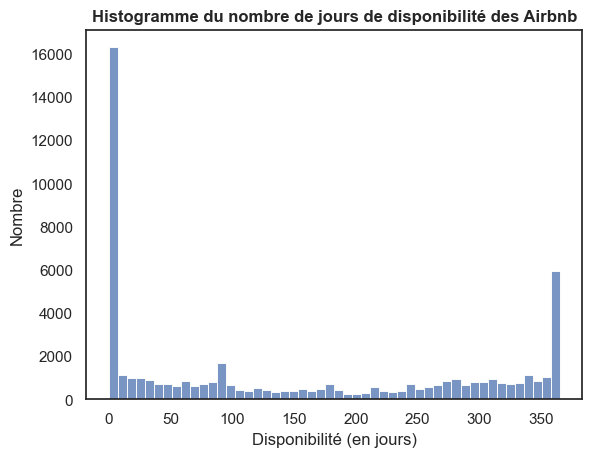

In [26]:
sns.histplot(data=df["Availability 365"],bins=int(50))
plt.title('Histogramme du nombre de jours de disponibilité des Airbnb', weight='bold')
plt.xlabel('Disponibilité (en jours)')
plt.ylabel('Nombre')

In [27]:
a = len(df[df['Availability 365']>300])
b = len(df[df['Availability 365']<60])
c = len(df[df['Availability 365']==0])
a,b,c

(12735, 22374, 14516)

On remarque que près de la moitié des Airbnb sont loués moins de 60 jours par an, ce qui semble correspondre au concept de base de Airbnb - c'est à dire louer sa maison ou son appartement quand on est en vacances ou autre pour arrondir ses fins de mois. 
Cependant, on voit aussi que plus de 12 000 Airbnb sont loués plus de 300 jours par an. On observe donc que certaines personnes louent quasiment en continuité leur logement sur Airbnb pour de courtes périodes, alors qu'ils pourraient le louer sur des longues durées. On peut donc supposer qu'il est plus intéressant financièrement de louer son bien sur Airbnb que en agence par exemple.

### 1.3 Influence de la taille du logement

On a vu dans la matrice de corrélation que la "taille" du logement était fortement corrélée au prix ce qui semble logique. On peut faire quelques statistiques descriptives pour avoir un aperçu des différentes tailles de logement. 

In [28]:
#On enlève les valeurs manquantes au niveau du nombre de salles de bain
df = df[df['Bathrooms'].notnull()]

Dans la partie modélisation, nous continuerons à enlever les lignes où il n'y a pas de données à propos du nombre de chambres, de lits, des frais de nettoyage, du dépôt de sécurité... Nous ne le faisons pas maintenant car cela ne laisse qu'environ 19000 lignes, et enlève des données essentielles pour l'analyse des reviews menée en partie 1.4.

In [29]:
#Nouveau data frame uniquement avec les airbnb où le nb de metres carrés est renseigné
df_feet = df.loc[(df['Square Feet'] !=0)]
len(df_feet)

52977

Text(0, 0.5, 'Quantité')

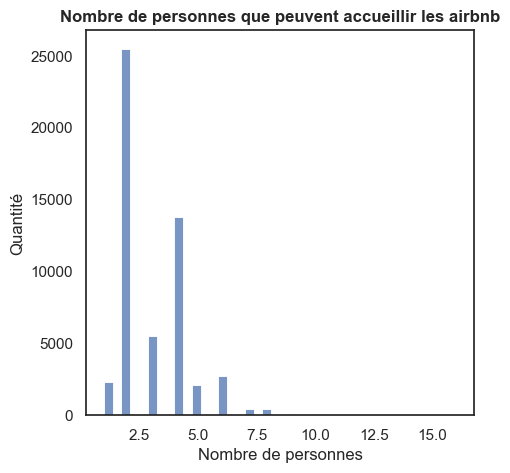

In [30]:
#Répartition du nombres de personnes que peuvent accueillir les Airbnb, pour savoir à quels types de logement on traite
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(df_feet['Accommodates'], bins=int(40))
plt.title ('Nombre de personnes que peuvent accueillir les airbnb', weight='bold')
plt.xlabel('Nombre de personnes')
plt.ylabel('Quantité')


La majorité des Airbnb accueillent 2 ou 4 personnes.

In [31]:
df_feet['Square Feet'].describe()

count     1482.000000
mean       544.098516
std        654.072407
min         11.000000
25%        291.000000
50%        431.000000
75%        646.000000
max      15059.000000
Name: Square Feet, dtype: float64


- il manque énormément de données sur les superficies : sur plus de 50 000 données à la base, on en a à peine 1500
- Le maximum de surface est de 15000 square feet ce qui correspond à 1393m2, probablement un erreur de saisie donc on va enlever tous les logements ayant une superficie supérieure à 2500 square feet (soit 232m2).

In [32]:
df_feet = df_feet.loc[(df_feet['Square Feet'] < 2500)]

Text(0, 0.5, 'Surface (en m2)')

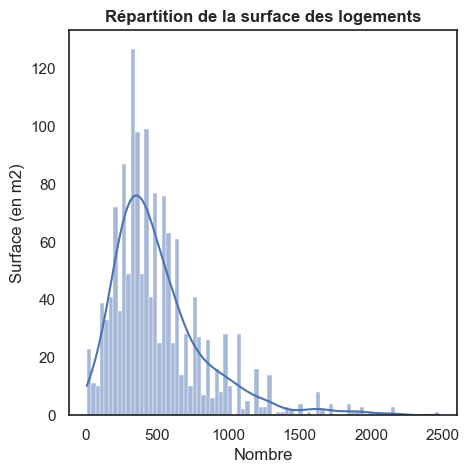

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=df_feet['Square Feet'], kde=True, bins=int(80))
plt.title ('Répartition de la surface des logements', weight='bold')
plt.xlabel('Surface (en square feet)')
plt.ylabel('Quantité')

A cause du nombre très important de données manquantes sur les surfaces des logements, on va désormais s'intéresser au nombre de chambres, de salles de bains, etc... qui sont également des bons indicateurs de la taille du logement.


In [34]:
df['Bathrooms'] = df['Bathrooms'].astype(int)

In [35]:
df['Bathrooms'].unique()

array([1, 0, 3, 2, 4, 6, 7, 5, 8])

In [36]:
df['Bedrooms'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  7.,  6., 10.,  8.])

In [37]:
df_bed = df.groupby('Bedrooms').agg({'Bedrooms':'count'})
df_bed.columns = ['count']
df_bed.reset_index(inplace=True)
df_bed.sort_values('count', ascending=False, ignore_index=True, inplace=True)
df_bed

Bedrooms  count
0       1.0  31801
1       0.0  11079
2       2.0   7849
3       3.0   2094
4       4.0    484
5       5.0     91
6       6.0     21
7       7.0      4
8      10.0      2
9       8.0      1

In [38]:
df_bath = df.groupby('Bathrooms').agg({'Bathrooms':'count'})
df_bath.columns = ['count']
df_bath.reset_index(inplace=True)
df_bath.sort_values('count', ascending=False, ignore_index=True, inplace=True)
df_bath

Bathrooms  count
0          1  49651
1          2   2914
2          0    538
3          3    308
4          4     59
5          6     30
6          5     22
7          7     13
8          8     12

Plus de 11 000 logements n'ont pas de chambre, on peut donc en déduire que ce sont des studios. La plus grande majorité des logements ont une unique salle de bain. 

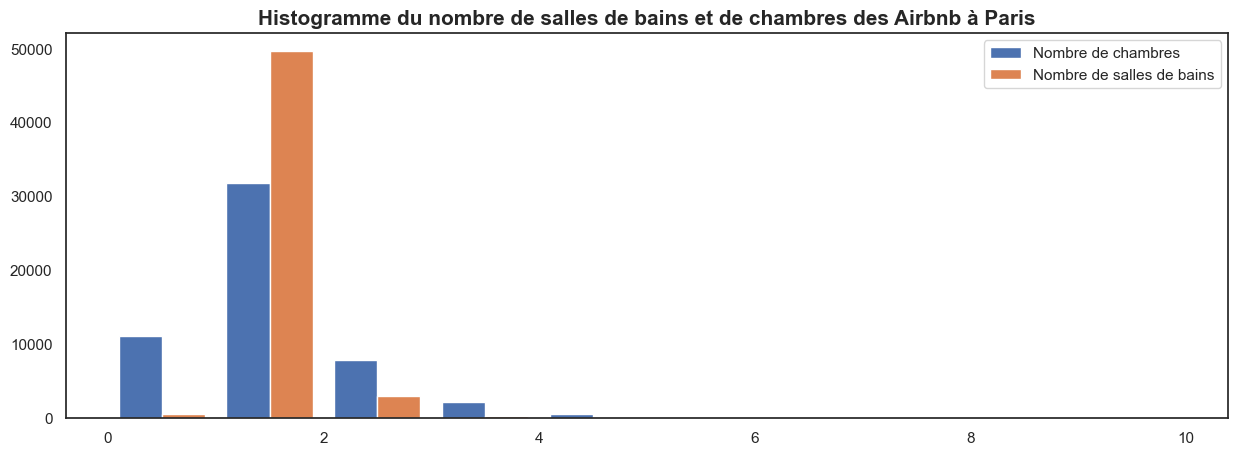

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.hist([df["Bedrooms"], df["Bathrooms"]], label=['Nombre de chambres', 'Nombre de salles de bains'], edgecolor = 'white')
plt.title("Histogramme du nombre de salles de bains et de chambres des Airbnb à Paris",size=15, weight='bold')
plt.legend()


### 1.4 Les reviews et les annonces

In [54]:
df_review = df[['Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per Month', 'Price']]

Text(0.5, 1.0, "Prix en fonction du nombre de reviews sur l'appartement")

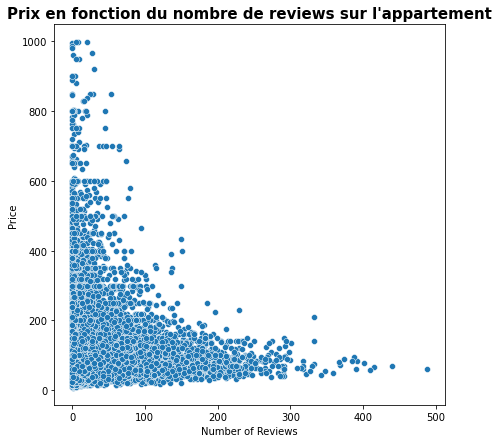

In [55]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Number of Reviews", y="Price", data=df_review)

plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Prix en fonction du nombre de reviews sur l'appartement",size=15, weight='bold')

On remarque clairement une corrélation négative entre le nombre de reviews et le prix. Les appartements les moins chers ont beaucoup plus de reviews. Plus précisement, pour des appartements ayant un prix inférieur à 200€, un nombre conséquent d'appartements ont plus de 200 reviews tandis que pour des appartements ayant un prix supérieur a 300€, aucun appartement n'a plus de 200 reviews.
 Cela peut s'expliquer par une demande moins importante pour les appartements plus chers, qui au final ont donc moins de reviews. Également, un loueur peut se permettre de mettre en vente son appartement moins souvent si le prix est très élevé (et donc moins de réservations, moins de reviews).

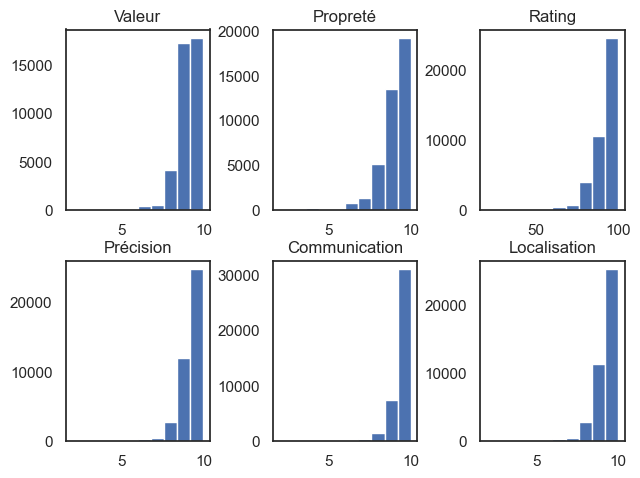

In [40]:

# On regarde la distribution sur les différentes notes données 

fig, ax = plt.subplots(2, 3)
fig.tight_layout()

ax[0, 0].hist(data["Review Scores Value"]) #row=0, col=0
ax[0, 0].set_title('Valeur')
ax[1, 0].hist(data["Review Scores Accuracy"]) #row=1, col=0
ax[1, 0].set_title('Précision')
ax[0, 1].hist(data["Review Scores Cleanliness"]) #row=0, col=1
ax[0, 1].set_title('Propreté')
ax[1, 1].hist(data["Review Scores Communication"]) #row=1, col=1
ax[1, 1].set_title('Communication')
ax[1, 2].hist(data["Review Scores Location"]) #row=1, col=2
ax[1, 2].set_title('Localisation')
ax[0, 2].hist(data["Review Scores Rating"]) #row=2, col=2
ax[0, 2].set_title('Rating')
plt.show()

Ensuite, pour déterminer les signaux de qualité transmis par les annonces, nous allos analyser ces dernières en regardant les mots les plus fréquemment utilisés pour décrire le bien mis à disposition sur la plateforme.  

In [41]:
#On regarde le nombre d'offres qui n'ont pas de description 
data['Description'].isnull().sum()

7

In [42]:
# Si on ne veut pas fausser l'analyse textuelle et avoir un message d'erreur, il faut enlever les lignes qui correspondent à des valeurs manquantes 
def transform(lst) :
  return ([i for item in lst for i in item.lower().split()])
full_reviews = transform(data['Description'].fillna(""))

On peut maintenant s'intéresser à la fréquence des mots sur les descriptions d'appartements, dans le but de regarder le lien potentiel avec les prix des Airbnb


In [43]:

# Fréquence de mots

nb_mots = collections.Counter(full_reviews) 

frq_mots = pd.DataFrame(nb_mots.most_common(8),
                             columns=['mots', 'occurences'])

frq_mots.head()


mots  occurences
0  the      234341
1  and      167659
2    a      159574
3   de      139466
4   et       92759

On obtient un résultat peu étonnant : les mots qui reviennent le plus sont des mots de liaison, des déterminants ou des conjonctions de coordination (« et »). 
Cependant, ces mots ne vont pas nous être utiles pour faire de l'analyse textuelle sur la qualité des descriptions. 
On va donc essayer d'enlever ces « stopwords », via la méthode vue en cours. 

In [44]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words(['french','english']))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ac3e2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ac3e2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
# On ajoute des stop words à la liste initiale, qui était mal configurée 

new_stopwords = ['1', 'one', '2', 'two', 'deux', '3','4','5', '10', '-', ':', ',', 'tout', '!', '.', "d'un", 'rue', 'pied', 'min', 'also', 'Paris', 'paris', 'paris.','paris,', 'parisian', 'place', 'flat', 'floor', 'room', 'bed', 'lit', 'chambre', 'situé', 'logement', 'salle', 'appartement', "l'appartement", 'apartment', 'minutes', 'métro', 'metro', 'studio','kitchen']
new_stopwords_list = stop_words.union(new_stopwords)

print(new_stopwords_list)


{'has', 'est', 'était', 'both', 'room', '.', 'ayantes', 'does', 'votre', 'be', 'ayez', 'l', 'hers', 'paris,', 'qui', 'eus', 'do', 'eussiez', 'étant', "you'll", 'ourselves', 'an', 'her', 'having', 'themselves', 'métro', 'son', 'aie', 'seriez', 'each', 't', "you've", 'sera', 'mustn', 'pas', 'mightn', 'aurons', 'haven', 'again', 'before', 'ait', 'when', 'those', 'es', 'fûtes', "that'll", 'and', 'which', 'tu', 'she', 'nous', 'tout', 'fut', 'off', 'vos', 'metro', 'how', 'fussent', 'paris.', 'étants', 'soyons', 'studio', 'se', 'mais', 'between', 'étées', 'vous', 'aurait', 'did', "isn't", 'apartment', 'sur', 'avons', 'under', 'serai', 'c', 'wouldn', 'himself', 'même', 'que', "you're", 'is', 'was', 'nos', 'aurais', 'ma', 'parisian', 'by', 'aux', "mustn't", 'lui', 'étions', 'eu', 'there', 'to', 'eussions', 'et', 'étés', "you'd", 'we', 'it', "hasn't", 'aura', 'auraient', 'pied', 'fusse', 'after', 'avait', 'ont', 'until', 'for', 'now', 'its', 'serait', 'herself', 'en', 're', 'too', 'sois', 'd', '

In [46]:

mots_listing = [word for word in full_reviews if word not in new_stopwords_list]
nb_mots_listing = collections.Counter(mots_listing)
nb_mots_listing_df = pd.DataFrame(nb_mots_listing.most_common(33),
                             columns=['words', 'count'])

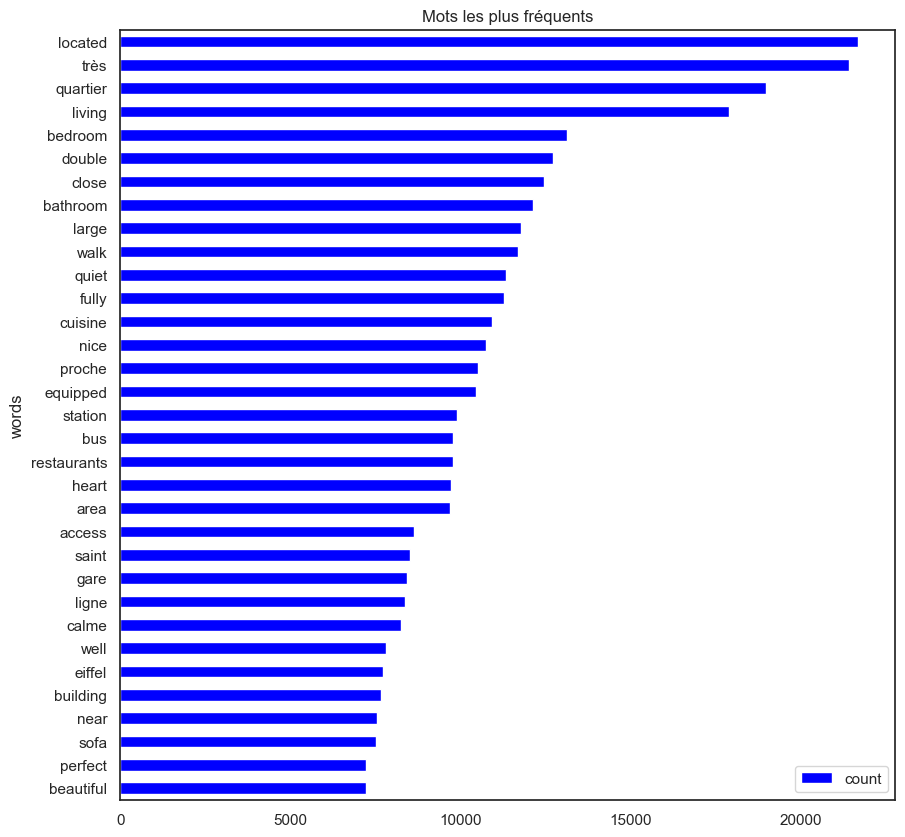

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))

nb_mots_listing_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Mots les plus fréquents")

plt.show()


## 2. Modélisation

### 2.0 Nettoyage plus approfondi du dataset

Puisque les biens traités sont tous uniques, une valeur manquante concernant certaines variables (prix, du nombre de personnes accueillies, dépôt de sécurité...) ne peut pas être remplacée par une valeur moyenne ou médiane ("imputing"). On décide de supprimer les lignes si l'une des variables suivantes est manquante.

In [49]:
df.isnull().sum()

Name                                  3
Space                             16185
Description                           7
Neighborhood Overview             21289
Notes                             36296
Transit                           19009
Access                            26061
Host ID                               0
Host Since                           11
Host Response Time                17743
Host Response Rate                17743
Host Total Listings Count            11
Street                                0
Neighbourhood                      6827
Neighbourhood Cleansed                0
City                                  0
Zipcode                               0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                             0
Bedrooms                            121
Beds                                 22


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53547 entries, 0 to 54512
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            53544 non-null  object 
 1   Space                           37362 non-null  object 
 2   Description                     53540 non-null  object 
 3   Neighborhood Overview           32258 non-null  object 
 4   Notes                           17251 non-null  object 
 5   Transit                         34538 non-null  object 
 6   Access                          27486 non-null  object 
 7   Host ID                         53547 non-null  int64  
 8   Host Since                      53536 non-null  object 
 9   Host Response Time              35804 non-null  object 
 10  Host Response Rate              35804 non-null  float64
 11  Host Total Listings Count       53536 non-null  float64
 12  Street                          

In [51]:
df = df[df['Cleaning Fee'].notnull()]
df = df[df['Security Deposit'].notnull()]

df = df[df['Bedrooms'].notnull()]
df = df[df['Amenities'].notnull()]
df = df[df['Review Scores Rating'].notnull()]
df = df[df['Host Since'].notnull()]
df = df[df['Host Response Time'].notnull()]

In [52]:
df.isnull().sum()

Name                                  0
Space                              2404
Description                           2
Neighborhood Overview              4306
Notes                              8755
Transit                            3713
Access                             5839
Host ID                               0
Host Since                            0
Host Response Time                    0
Host Response Rate                    0
Host Total Listings Count             0
Street                                0
Neighbourhood                      1805
Neighbourhood Cleansed                0
City                                  0
Zipcode                               0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                             0
Bedrooms                              0
Beds                                  2


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15508 entries, 0 to 54508
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            15508 non-null  object 
 1   Space                           13104 non-null  object 
 2   Description                     15506 non-null  object 
 3   Neighborhood Overview           11202 non-null  object 
 4   Notes                           6753 non-null   object 
 5   Transit                         11795 non-null  object 
 6   Access                          9669 non-null   object 
 7   Host ID                         15508 non-null  int64  
 8   Host Since                      15508 non-null  object 
 9   Host Response Time              15508 non-null  object 
 10  Host Response Rate              15508 non-null  float64
 11  Host Total Listings Count       15508 non-null  float64
 12  Street                          

Maintenant qu'il n'y a plus de valeurs manquantes pour des colonnes essentielles à notre modèle, nous allons transformer des variables qualitatives en variables quantitatives. Par exemple, la variable "Cancellation Policy" peut jouer un rôle très important dans la réservation d'un Airbnb - on aura plutôt tendance à favoriser un Airbnb avec des conditions d'annulation flexibles en cas d'imprévu.

Après lecture des indications liées aux différents modes d'annulation et de remboursement, on décide d'attribuer un score entre 1 et 5 aux annonces ; 5 correspond à "super_strict60", qui laisse très peu de flexibilité aux clients, et 1 à "flexible", qui permet d'annuler jusqu'à 24h à l'avance sans frais.

Il n'y a aucune annonce correspondant à "super_strict_60", donc tous nos listings auront un score entre 1 et 4. On crée la nouvelle variable, puis on la fait correspondre aux politiques d'annulation.

In [54]:
df["Score Annulation"] = 0

In [55]:
df["Cancellation Policy"].unique()

array(['strict', 'moderate', 'flexible', 'super_strict_30'], dtype=object)

In [56]:
df.loc[df['Cancellation Policy']=='flexible', "Score Annulation"] = 1 
df.loc[df['Cancellation Policy']=='moderate', "Score Annulation"] = 2
df.loc[df['Cancellation Policy']=='strict', "Score Annulation"] = 3
df.loc[df['Cancellation Policy']=='super_strict_30', "Score Annulation"] = 4 

In [57]:
df

Name  \
0                          STUDIO PIGALLE W BALCONY   
8                         Montmartre-Metro Abbesses   
16             ♥ Exotic Loft Montmartre + terrace !   
19               Cosy flat / Montmartre 10 min walk   
33                        flat to rent these summer   
...                                             ...   
54500             Cosy studio w/bath - Eiffel Tower   
54504  Apt 60 m² balcony Champ de Mars Eiffel Tower   
54506                           Chic district, B&B.   
54507                Blvd St Germain - Orsay Museum   
54508           Rue Cler at 500m from Eiffel Tower!   

                                                   Space  \
0      This newly refurbished flat is ideal for a cou...   
8      Quartier bobo (bourgeois-bohème) où se rencont...   
16     Welcome to you! - Loft 80m² near Montmartre  -...   
19     The Sacré Coeur and the Abbesses street is 10 ...   
33     My flat is located in Le marais nearby Place d...   
...                                                  ...   
54500  This small apartment has been completely renov...   
54504                                                NaN   
54506  Nestled in a residential, safe and central are...   
54507  We are a family of antique dealers and interio...   
54508  Ce logement se trouve au 2e étage et comporte ...   

                                             Description  \
0      In the heart of Montmarte Pigalle, this lovely...   
8      Petit logement pour 2 personnes (15m²-161 sq f...   
16     Exotic loft with a terrace of 35 m² at the foo...   
19     The apartment is ideally located in Paris, at ...   
33     I rent my flat these summer (july and august) ...   
...                                                  ...   
54500  Charming & quiet place in the historical distr...   
54504  Charming apt - 60m² - near Champ de Mars - Eif...   
54506  This beautiful 160 sq meter apartment is locat...   
54507  Cosy and very quiet one bedroom apartment (sle...   
54508  Logement très calme, ensoleillé, situé derrièr...   

                                   Neighborhood Overview  \
0      It is central enough for you to walk your way ...   
8      L'appartement se situe à 180 mètres du métro A...   
16     Nearby you will find many shops for groceries,...   
19     The apartment is very well located for explori...   
33     Le Marais is a nice area, full of old building...   
...                                                  ...   
54500                                                NaN   
54504                                                NaN   
54506  Located on the left bank of the Seine, it's on...   
54507  The 7th district is one of the most exclusive ...   
54508  Quartier "vivant" aussi bien de jour comme de ...   

                                                   Notes  \
0      Real globetrotters, we are real Parisians with...   
8      -----Internet free WIFI------ -----Bed linen a...   
16     My wife Michelle and I Damien, pay attention t...   
19     Suivant la saison et la durée de votre séjour,...   
33                                   - pas d'animaux svp   
...                                                  ...   
54500                                                NaN   
54504  Domestic equipment : nespresso, fridge, toaste...   
54506  You can check-in between 14:00 pm and 22:00 pm...   
54507  Our apartment has a king size bed but can be s...   
54508                                                NaN   

                                                 Transit  \
0      The flat is ideally located in Montmartre Piga...   
8                                                    NaN   
16     There are many bus lines and subway to anywher...   
19     Located near the Simplon metro station (line 4...   
33     all transports facilities nearby To get here f...   
...                                                  ...   
54500  Metro Line 8 Metro Line 13 Rer station Invalid...   
54504  Access : metros

De même, on crée une variable numérique Réactivité qui correspond à la qualité de "Host Response Time" ; plus l'hôte répond rapidement, plus le score est bas.

In [58]:
df["Reactivite"] = 0

In [59]:
df["Host Response Time"].unique()

array(['within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [60]:
df.loc[df['Host Response Time']=='within an hour', "Reactivite"] = 1 
df.loc[df['Host Response Time']=='within a few hours', "Reactivite"] = 2
df.loc[df['Host Response Time']=='within a day', "Reactivite"] = 3
df.loc[df['Host Response Time']=='a few days or more', "Reactivite"] = 4 

Enfin, on crée une variable "Popu Arrondissement" qui correspond au nombre d'annonces par arrondissement ; en effet, cette variable peut influencer le prix d'une annonce et aussi favoriser une réservation par rapport à une autre annonce.

In [61]:
df["Popu Arrondissement"]=0

In [62]:
df['Arrondissement'].unique()

array([18,  4, 17, 19, 15,  7,  9, 10, 12, 11,  8, 13,  6,  5,  1,  3, 20,
        2, 14, 16], dtype=int64)

In [63]:
listepopu = df.groupby(['Arrondissement']).agg({'Arrondissement':'count'})
listepopu


Arrondissement
Arrondissement                
1                          487
2                          692
3                          887
4                          808
5                          685
6                          736
7                          583
8                          465
9                          656
10                        1110
11                        1494
12                         485
13                         400
14                         522
15                        1066
16                         739
17                         885
18                        1577
19                         580
20                         651

In [64]:
df['Popu Arrondissement'] = df['Arrondissement'].groupby(df['Arrondissement']).transform('count')

In [65]:
df['Popu Arrondissement'].unique()

array([1577,  808,  885,  580, 1066,  583,  656, 1110,  485, 1494,  465,
        400,  736,  685,  487,  887,  651,  692,  522,  739], dtype=int64)

In [66]:
df

Name  \
0                          STUDIO PIGALLE W BALCONY   
8                         Montmartre-Metro Abbesses   
16             ♥ Exotic Loft Montmartre + terrace !   
19               Cosy flat / Montmartre 10 min walk   
33                        flat to rent these summer   
...                                             ...   
54500             Cosy studio w/bath - Eiffel Tower   
54504  Apt 60 m² balcony Champ de Mars Eiffel Tower   
54506                           Chic district, B&B.   
54507                Blvd St Germain - Orsay Museum   
54508           Rue Cler at 500m from Eiffel Tower!   

                                                   Space  \
0      This newly refurbished flat is ideal for a cou...   
8      Quartier bobo (bourgeois-bohème) où se rencont...   
16     Welcome to you! - Loft 80m² near Montmartre  -...   
19     The Sacré Coeur and the Abbesses street is 10 ...   
33     My flat is located in Le marais nearby Place d...   
...                                                  ...   
54500  This small apartment has been completely renov...   
54504                                                NaN   
54506  Nestled in a residential, safe and central are...   
54507  We are a family of antique dealers and interio...   
54508  Ce logement se trouve au 2e étage et comporte ...   

                                             Description  \
0      In the heart of Montmarte Pigalle, this lovely...   
8      Petit logement pour 2 personnes (15m²-161 sq f...   
16     Exotic loft with a terrace of 35 m² at the foo...   
19     The apartment is ideally located in Paris, at ...   
33     I rent my flat these summer (july and august) ...   
...                                                  ...   
54500  Charming & quiet place in the historical distr...   
54504  Charming apt - 60m² - near Champ de Mars - Eif...   
54506  This beautiful 160 sq meter apartment is locat...   
54507  Cosy and very quiet one bedroom apartment (sle...   
54508  Logement très calme, ensoleillé, situé derrièr...   

                                   Neighborhood Overview  \
0      It is central enough for you to walk your way ...   
8      L'appartement se situe à 180 mètres du métro A...   
16     Nearby you will find many shops for groceries,...   
19     The apartment is very well located for explori...   
33     Le Marais is a nice area, full of old building...   
...                                                  ...   
54500                                                NaN   
54504                                                NaN   
54506  Located on the left bank of the Seine, it's on...   
54507  The 7th district is one of the most exclusive ...   
54508  Quartier "vivant" aussi bien de jour comme de ...   

                                                   Notes  \
0      Real globetrotters, we are real Parisians with...   
8      -----Internet free WIFI------ -----Bed linen a...   
16     My wife Michelle and I Damien, pay attention t...   
19     Suivant la saison et la durée de votre séjour,...   
33                                   - pas d'animaux svp   
...                                                  ...   
54500                                                NaN   
54504  Domestic equipment : nespresso, fridge, toaste...   
54506  You can check-in between 14:00 pm and 22:00 pm...   
54507  Our apartment has a king size bed but can be s...   
54508                                                NaN   

                                                 Transit  \
0      The flat is ideally located in Montmartre Piga...   
8                                                    NaN   
16     There are many bus lines and subway to anywher...   
19     Located near the Simplon metro station (line 4...   
33     all transports facilities nearby To get here f...   
...                                                  ...   
54500  Metro Line 8 Metro Line 13 Rer station Invalid...   
54504  Access : metros

## 2.1 Préparation du modèle

Le dataset étant de taille assez conséquente, nous allons le "shuffler" puis le diviser en 5, afin d'avoir 5 samples iid.

In [67]:
df_shuffle = df.sample(frac = 1)
df_shuffle

Name  \
10635             2 pièces au coeur d'Opéra   
21649                      LOUVRE PYRAMIDES   
46749      "a Flat with a Cat" - Montmartre   
3829    Great 1BD, ideally located in Paris   
5200            MUST! Montmartre Apartment!   
...                                     ...   
36865    Appartement charmant et chaleureux   
17780  Appartement à deux pas de Montmartre   
16767    Se sentir comme chez soi, 2 pièces   
806                        Heaven at Marais   
38429    Tiny charming studio in Montmartre   

                                                   Space  \
10635  The location is very central. The appartment i...   
21649  This charming and unique apartment in the hear...   
46749  Petite surface très bien agencée et équipée.  ...   
3829   Flat entirely redesigned and renovated recentl...   
5200   Completely redone . It is a very pleasant apar...   
...                                                  ...   
36865  L'appartement est meublé et équipé pour la vie...   
17780  Logement rénové  Tout équipé  2 pièces : 2 gra...   
16767  Bel appartement lumineux, tout équipé et refai...   
806                                                  NaN   
38429  In the heart of old Montmartre (Paris 18th), c...   

                                             Description  \
10635  Mon logement est proche d'Opéra, des Galeries ...   
21649  Charming duplex in the heart of the prestigiou...   
46749  ATTENTION: mon CHAT vit dans cet appartement. ...   
3829   This apartment, fully refurbished recently, is...   
5200   Entirely Renewed Apartment at the feet of MONT...   
...                                                  ...   
36865  Notre appartement de deux pièces avec balcon f...   
17780  Appartement situé dans le quartier au charme a...   
16767  Je propose bel appartement lumineux, tout équi...   
806    This modern and wonderful 65 square meters , 1...   
38429  In the heart of old Montmartre (Paris 18th), c...   

                                   Neighborhood Overview  \
10635                                                NaN   
21649  You will be spoilt for choice! Extremely well ...   
46749  Le quartier est très dynamique mais calme à la...   
3829   Close to the flat, you can easily enjoy most o...   
5200   It is Montmartre. It is Paris. Right across th...   
...                                                  ...   
36865  Notre quartier est particulièrement vivant et ...   
17780  Montmartre est un quartier au charme authentiq...   
16767  Le quartier est vivant, multi éthnique et très...   
806                                                  NaN   
38429                                                NaN   

                                                   Notes  \
10635                                                NaN   
21649  Perfect for families with children, business t...   
46749                                                NaN   
3829   Late arrivals are possible. There is a police ...   
5200   Please don't hesitate to call me for more prec...   
...                                                  ...   
36865                                                NaN   
17780   On attend un comportement correct et responsable   
16767  Pour tout séjour de 7 nuits minimum comprenant...   
806    The Temple district, an authentic part of Pari...   
38429  Please note that, yes, it is a very small plac...   

                                                 Transit  \
10635  Very near to Saint-Lazare station. In Saint-La...   
21649  Metros Pyramide and Tuilleries (line 1) are li...   
46749  L'appartement est accessible par la ligne 12 (...   
3829   Most of Public transports are directly accessi...   
5200   Travelers will be delighted to see that the Su...   
...                                                  ...   
36865  Ligne 11 du métro (station Goncourt) à 50 mètr...   
17780  Très bien desservi  Metro  Bus  Station de tax...   
16767  Pour accéder à l'appartement, vous pouvez d

In [68]:
df_splits = np.array_split(df_shuffle, 5)
df_splits

[                                      Name  \
 10635            2 pièces au coeur d'Opéra   
 21649                     LOUVRE PYRAMIDES   
 46749     "a Flat with a Cat" - Montmartre   
 3829   Great 1BD, ideally located in Paris   
 5200           MUST! Montmartre Apartment!   
 ...                                    ...   
 50523    Studio paris 7-proche Tour Eiffel   
 51395               luminous and cozy flat   
 49428     Cosy & New studio Champs-Elysees   
 14054     Charming Apartment in Montmartre   
 14297   Great View Montmartre studio Paris   
 
                                                    Space  \
 10635  The location is very central. The appartment i...   
 21649  This charming and unique apartment in the hear...   
 46749  Petite surface très bien agencée et équipée.  ...   
 3829   Flat entirely redesigned and renovated recentl...   
 5200   Completely redone . It is a very pleasant apar...   
 ...                                                  ...   
 50523 

In [69]:
df1 = df_splits[0]

On travaillera donc sur 5 subsets.

### 2.2 Traitement du 1er subset

Nous traiterons uniquement ici le 1er subset pour des questions de simplification ; de plus, les 5 subsets étant iid, en traiter un revient à priori à traiter n'importe lequel.
En reprenant les graphes de la partie 1, on remarque que la majorité des Airbnb accueillent 8 personnes ou moins, et que la majorité des prix sont en dessous de 400 euros par nuit. Pour éviter les outliers, on sélectionne les parties du dataframe qui respectent ces conditions.

In [136]:
model1 = df1[(df1['Price'] < 400) & (df1['Accommodates'] <= 8)]
list(model1.columns)

['Name',
 'Space',
 'Description',
 'Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Host ID',
 'Host Since',
 'Host Response Time',
 'Host Response Rate',
 'Host Total Listings Count',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'City',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Has Availability',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Cancellation Policy',
 'Calculated host listings count',
 'Reviews per Month',
 'Geolocation',
 'Arrondissemen

In [172]:
df1['Price'].mean()

100.65022566086395

Le prix moyen par nuit du subset est de 100 euros par nuit.

On sélectionne les colonnes que l'on gardera pour les régressions ; les colonnes suivantes sont celles que l'on supprime du modèle.

In [139]:
drop_cols = ['Name','Space','Description','Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Host ID',
 'Host Since',
 'Host Response Rate',
 'Host Total Listings Count',
 'Street',
 'Neighbourhood',
 'Host Response Time',
 'Neighbourhood Cleansed',
 'City',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Security Deposit',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Has Availability',
 'Availability 60',
 'Availability 90',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Cancellation Policy',
 'Reviews per Month',
 'Geolocation'
]

On prépare donc nos vecteurs X et y, avec les variables explicatives et la variable expliquée - ici, le prix 'Price'.

In [153]:
X = model1.copy()
X = X.drop(drop_cols,axis=1)
y = X['Price']


In [154]:
X.columns, y

(Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
        'Cleaning Fee', 'Availability 30', 'Availability 365',
        'Calculated host listings count', 'Arrondissement', 'Score Annulation',
        'Reactivite', 'Popu Arrondissement'],
       dtype='object'),
 10635     85.0
 21649    180.0
 46749     45.0
 3829      99.0
 5200      85.0
          ...  
 50523     82.0
 51395     56.0
 49428     84.0
 14054    100.0
 14297     98.0
 Name: Price, Length: 3063, dtype: float64)

On simplifie le nom des variables en mettant en minuscule les premières lettres de celles-ci.

On supprime évidemment le prix des variables explicatives.

In [156]:
X = X.drop('Price', axis = 1)
X.columns

Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee',
       'Availability 30', 'Availability 365', 'Calculated host listings count',
       'Arrondissement', 'Score Annulation', 'Reactivite',
       'Popu Arrondissement'],
      dtype='object')

In [151]:
cols = [x.lower() for x in X.columns.tolist()]
X.columns = cols

In [161]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2450 entries, 51090 to 52491
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Accommodates                    2450 non-null   int64  
 1   Bathrooms                       2450 non-null   int32  
 2   Bedrooms                        2450 non-null   float64
 3   Beds                            2450 non-null   float64
 4   Cleaning Fee                    2450 non-null   float64
 5   Availability 30                 2450 non-null   int64  
 6   Availability 365                2450 non-null   int64  
 7   Calculated host listings count  2450 non-null   int64  
 8   Arrondissement                  2450 non-null   int64  
 9   Score Annulation                2450 non-null   int64  
 10  Reactivite                      2450 non-null   int64  
 11  Popu Arrondissement             2450 non-null   int64  
dtypes: float64(3), int32(1), int6

In [157]:
df2 = X.copy()
y_copy = y.copy()

On subdivise le dataset en une partie test train (pour fiter le modèle), test (pour évaluer celui-ci) et un set de validation.

In [162]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [163]:
print(f' X_train shape : {X_train.shape}')
print(f' X_val shape : {X_val.shape}')
print(f' X_test shape : {X_test.shape}')

 X_train shape : (1470, 12)
 X_val shape : (490, 12)
 X_test shape : (490, 12)


### 2.3 Approche par OLS

In [81]:
X_train.head()

accommodates  bathrooms  bedrooms  beds  cleaning fee  availability 30  \
10822             2          1       1.0   1.0          30.0                0   
23300             2          1       0.0   1.0          99.0                0   
41739             2          1       1.0   1.0          50.0               12   
43025             6          1       2.0   4.0         120.0                0   
19016             2          1       1.0   1.0          26.0                1   

       availability 365  calculated host listings count  arrondissement  \
10822               298                               1               3   
23300               248                             102               3   
41739                23                               1              11   
43025               230                               2              14   
19016                34                               1              15   

       score annulation  reactivite  popu arrondissement  
10822                 2           3                  887  
23300                 3           3                  887  
41739                 3           1                 1494  
43025                 3           1                  522  
19016                 3           2                 1066

On procède à la régression par OLS sur le set d'entraînement X_train.

In [168]:
std = StandardScaler() 
std.fit(X_train.values) 
X_train_scaled = std.transform(X_train.values)
train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
model = sm.OLS(np.array(y_train), sm.add_constant(train_df))

fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          4.48e-276
Time:                        11:23:53   Log-Likelihood:                -7293.1
No. Observations:                1470   AIC:                         1.461e+04
Df Residuals:                    1457   BIC:                         1.468e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             96.6816      0.905    106.819      0.000      94.906      98.457
Accommodates                      13.3028      1.738      7.653      0.000       9.893      16.713
Bathrooms                          7.6948      0.985      7.811      0.000       5.762       9.627
Bedrooms                          14.7513      1.317     11.201      0.000      12.168      17.335
Beds                               1.3304      1.701      0.782      0.434      -2.006       4.667
Cleaning Fee                      13.2047      1.153     11.456      0.000      10.944      15.466
Availability 30                    3.5951      1.080      3.330      0.001       1.477       5.713
Availability 365                   4.1593      1.090      3.815      0.000       2.021       6.298
Calculated host listings count     1.8904      0.982      1.925      0.054      -0.036       3.817
Arrondissement                   -11.3424      0.994    -11.416      0.000     -13.291      -9.393
Score Annulation                   1.7520      0.954      1.837      0.066      -0.119       3.622
Reactivite                        -1.6065      0.945     -1.700      0.089      -3.461       0.248
Popu Arrondissement               -0.9269      0.962     -0.964      0.335      -2.814       0.960
==============================================================================
Omnibus:                      320.136   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1614.640
Skew:                           0.926   Prob(JB):                         0.00
Kurtosis:                       7.788   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On remarque plusieurs choses : le R^2 est d'environ 0.6, i.e. les variables explicatives permettent assez bien de décrire le prix des Airbnb parisiens. La plupart des p-values sont faibles, donc on a une bonne significativité de celles-ci. La popularité de l'arrondissement et le nombre de lits sont les variables les moins significatives.
Le signe du coefficient lié à la "réactivité" est cohérent, car notre variable réactivité est indexée "à l'envers" (par choix), et mesure en réalité le manque de réactivité des hôtes. La capacité d'accueil, le nombre de chambres, l'arrondissement et les frais de ménage, par leurs "grands" coefficients, sont les variables les plus significatives en pratique.
On procède à la même régression, cette fois-ci appliquée au set de validation

### 2.4 Regression avec Scikit-Learn

On définit d'abord l'erreur absolue moyenne entre les valeurs réelles et les valeurs prédites. ELle permet de mesurer la précision du modèle. Plus elle est proche de 0, plus le modèle est précis. Elle est donnée sur la même échelle que les valeurs du modèle, donc il faudra la comparer par rapport aux prix pour se rendre compte de la précision.

In [170]:
def ema_score(pred, actual):
    return np.mean(np.abs(np.exp(actual) - np.exp(pred)))

In [171]:
lr = LinearRegression() 

lr.fit(X_train_scaled, y_train)

train_pred = lr.predict(X_train_scaled)
val_pred = lr.predict(X_val_scaled)

print(f'Linear Regression (train) R^2: {lr.score(X_train_scaled, y_train)}')
print(f'Linear Regression (validation) R^2: {lr.score(X_val_scaled, y_val)}')

print("\n EMA du Train:", round(mean_absolute_error(y_train, train_pred),4))
print("EMA de Validation:", round(mean_absolute_error(y_val, val_pred),4))

Linear Regression (train) R^2: 0.5956374175778889
Linear Regression (validation) R^2: 0.5457533089746427

 EMA du Train: 24.1071
EMA de Validation: 26.0274


Les R^2 sont relativement similaires à celui trouvé dans la partie précédente. De plus, l'erreur moyenne absolue est d'environ 25 (si on prend la moyenne entre le train et le set de validation) ; comparée aux prix moyens (100 euros par nuit environ dans ce subset), cette erreur est correcte, et le modèle est assez précis (même s'il pourrait l'être davantage).

In [173]:
y_train.describe()

count    1470.000000
mean       96.681633
std        54.348690
min        10.000000
25%        60.000000
50%        80.000000
75%       119.000000
max       380.000000
Name: Price, dtype: float64

On trace maintenant les prix réels comparés à ceux prédits, ainsi que la distribution des résidus.

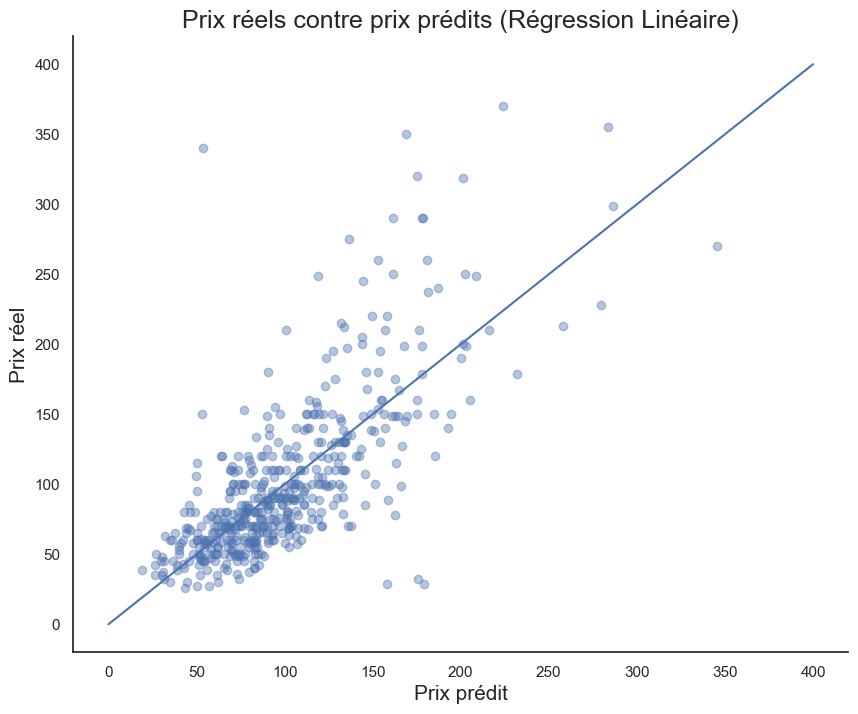

In [174]:
plt.figure(figsize=(10, 8))
plt.plot([0,400], [0,400], )
plt.scatter(val_pred, y_val, alpha=0.4)
sns.despine()
plt.ylabel('Prix réel', size=15)
plt.xlabel('Prix prédit', size=15)
plt.title('Prix réels contre prix prédits (Régression Linéaire)', size=18);
plt.savefig('actual_plot', bbox_inches ='tight', dpi = 400)

Les points sont assez proches du tracé de la fonction identité. C'est assez cohérent avec la valeur du R^2 calculée. On observe une dispersion pour les prix les plus élevés, qui sont souvent plus faibles dans leur valeur prédite que leur valeur réelle.

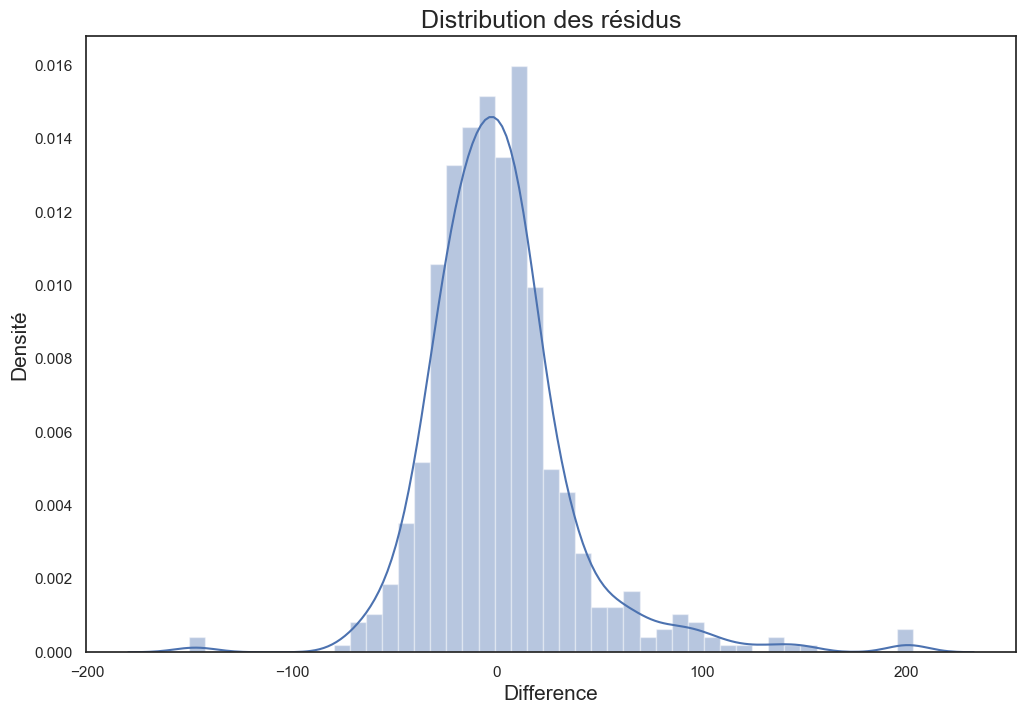

In [88]:
plt.figure(figsize=(12,8))
sns.distplot(y_val - val_pred) 
plt.title('Distribution des résidus', size = 18)
plt.xlabel('Difference', size = 15);
plt.ylabel('Densité', size = 15);
plt.savefig('residuals', bbox_inches ='tight', dpi = 400);

Les résidus semblent plutôt être distribués selon une loi normale centrée en 0. Cohérent avec l'hypothèse habituelle de normalité des termes d'erreur.

Pour éviter l'overfitting et améliorer notre modèle, on passe à une partie de regularisation, via les méthodes de Lasso et Ridge. Le but sera de minimiser le biais et la variance, sans en privilégier un en particulier.

### 2.5 Regularisation

####  2.5.1 Lasso

On ajoute un terme de pénalité en norme L1, ici noté alpha.

In [175]:
kf = KFold(n_splits=5, shuffle=True, random_state = 21)

alphavec = 10**np.linspace(-3,3,500)

lasso_model = LassoCV(alphas = alphavec, cv=kf)

lasso_model.fit(X_train_scaled, y_train)

print('LassoCV alpha:', lasso_model.alpha_)

print(f'LassoCV train R^2: {lasso_model.score(X_train_scaled, y_train):.3f}')
print(f'LassoCV validation R^2: {lasso_model.score(X_val_scaled, y_val):.3f}')

train_pred = lasso_model.predict(X_train_scaled)
y_val_pred = lasso_model.predict(X_val_scaled)

print('EMA pour le train en LassoCV:', round(mean_absolute_error(y_train, train_pred),4))
print('EMA pour la validation en LassoCV:', round(mean_absolute_error(y_val, y_val_pred),4))

LassoCV alpha: 0.14200531816536832
LassoCV train R^2: 0.596
LassoCV validation R^2: 0.546
EMA pour le train en LassoCV: 24.0852
EMA pour la validation en LassoCV: 25.9903


Les R^2 restent semblables à ceux qu'on avait obtenus avant (on n'a pas ajouté ou enlevé de variable explicative, donc cohérent) ; l'erreur moyenne absolue reste semblable à celle trouvée juste avant. Le alpha vaut 0.14, donc les coefficients ont une valeur incluse entre 0 et celle de la régression simple. Plus alpha augmente, plus les coefficients tendent vers 0 à cause de la pénalité.

De même, on trace les prix réels en comparaison avec ceux prédits.

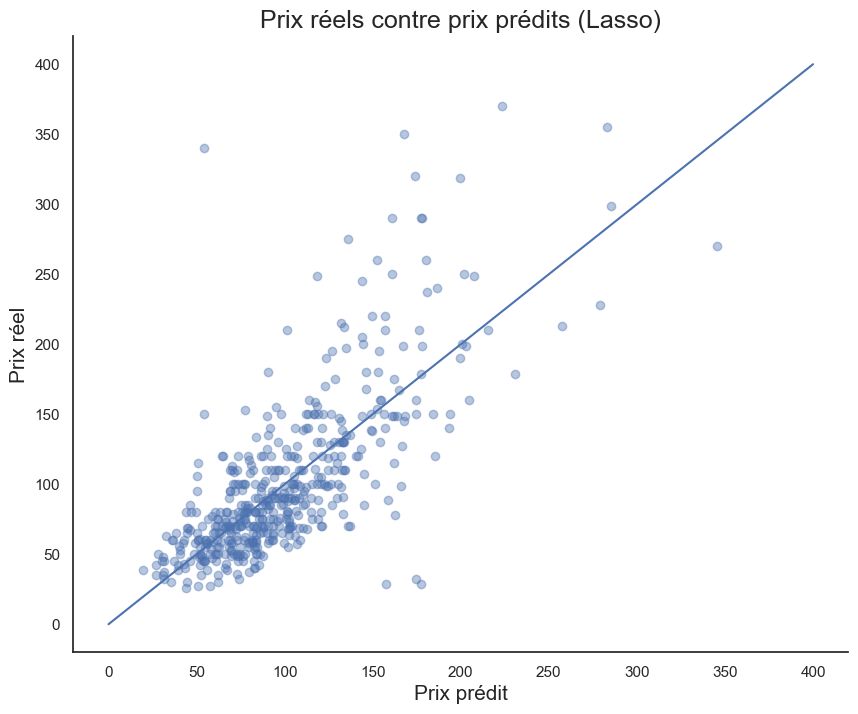

In [179]:
plt.figure(figsize=(10, 8))
plt.plot([0,400], [0,400])
plt.scatter(y_val_pred, y_val, alpha=0.4)
sns.despine()
plt.ylabel('Prix réel', size=15)
plt.xlabel('Prix prédit', size=15)
plt.title('Prix réels contre prix prédits (Lasso)', size=18);
plt.savefig('actual plot', bbox_inches ='tight', dpi = 400)

On remarque la même chose que précedemment : la plupart des prix sont assez proches de la droite identité, mais quand ils augmentent, ils tendent plus souvent à être plus grands dans leur valeur réelle que prédite. 

#### 2.5.2 Ridge

Le terme de pénalité passe maintenant sous norme 2.

In [180]:
alphavec = 10**np.linspace(-3,3,500)

ridge_model = RidgeCV(alphas = alphavec, cv=kf)

ridge_model.fit(X_train_scaled, y_train)

print('Ridge alpha:', ridge_model.alpha_)

print(f'RidgeCV train R^2: {ridge_model.score(X_train_scaled, y_train):.3f}')
print(f'RidgeCV validation R^2: {ridge_model.score(X_val_scaled, y_val):.3f}')

train_pred = ridge_model.predict(X_train_scaled)
y_val_pred = ridge_model.predict(X_val_scaled)

print('EMA du Train pour Ridge:', round(mean_absolute_error(y_train, train_pred),4))
print('EMA de Validation pour Ridge :', round(mean_absolute_error(y_val, y_val_pred),4))

Ridge alpha: 74.08656834939568
RidgeCV train R^2: 0.595
RidgeCV validation R^2: 0.545
EMA du Train pour Ridge: 24.0579
EMA de Validation pour Ridge : 25.9661


#### Coefficients de la régression linéaire

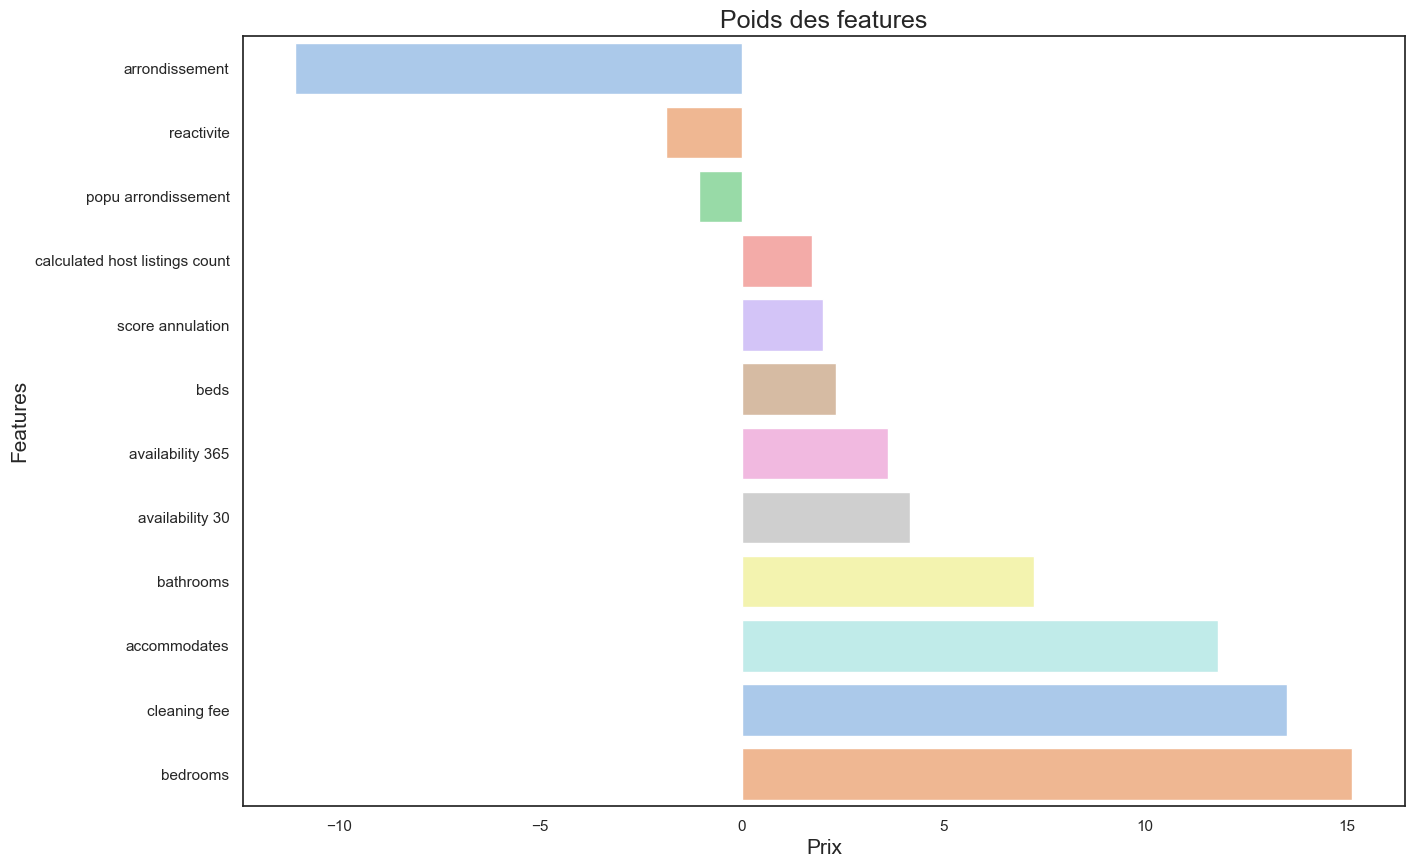

In [92]:
coef_list = sorted(list(zip(X_train.columns, lm.coef_)), key= lambda x : x[1])

x_values = [x[0] for x in coef_list]
y_values = [y[1] for y in coef_list]

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x=y_values, y=x_values, palette=("pastel"))
#ax.set(xticks=xtick_list)
ax.set_title('Poids des features', size=18)
ax.set_xlabel('Prix', size=15)
ax.set_ylabel('Features', size=15)
plt.savefig('features', bbox_inches ='tight', dpi = 400)

In [93]:
x_values

['arrondissement',
 'reactivite',
 'popu arrondissement',
 'calculated host listings count',
 'score annulation',
 'beds',
 'availability 365',
 'availability 30',
 'bathrooms',
 'accommodates',
 'cleaning fee',
 'bedrooms']

In [94]:
coefs_df = pd.DataFrame(columns=['Feature', 'Coefficient'])
coefs_df['Feature'] = x_values
coefs_df['Coefficient'] = y_values
coefs_df.to_csv('lr_coefs.csv')
coefs_df

Feature  Coefficient
0                   arrondissement   -11.070406
1                       reactivite    -1.883582
2              popu arrondissement    -1.062173
3   calculated host listings count     1.729570
4                 score annulation     2.002012
5                             beds     2.330978
6                 availability 365     3.613981
7                  availability 30     4.154215
8                        bathrooms     7.234332
9                     accommodates    11.814139
10                    cleaning fee    13.522262
11                        bedrooms    15.131968

In [95]:
import matplotlib.style as style 

In [96]:
actionable_feats = ['arrondissement', 'reactivite', 'score annulation', 'beds', 'calculated host listings count', 'availability 365', 'availability 30', 'bathrooms', 'accommodates', 'bedrooms', 'cleaning fee']
coefs = coefs = sorted(list(zip(lm.coef_, X.columns)))

coefs = coefs[::-1]
improvements = [x for x in coefs if x[1] in actionable_feats]

improvements

[(15.131967647939753, 'bedrooms'),
 (13.522262052245, 'cleaning fee'),
 (11.814139096082732, 'accommodates'),
 (7.234332213699666, 'bathrooms'),
 (4.154214642301592, 'availability 30'),
 (3.613980704096907, 'availability 365'),
 (2.330978379403584, 'beds'),
 (2.002011870260745, 'score annulation'),
 (1.729569527922803, 'calculated host listings count'),
 (-1.8835823882358924, 'reactivite'),
 (-11.070406359513932, 'arrondissement')]

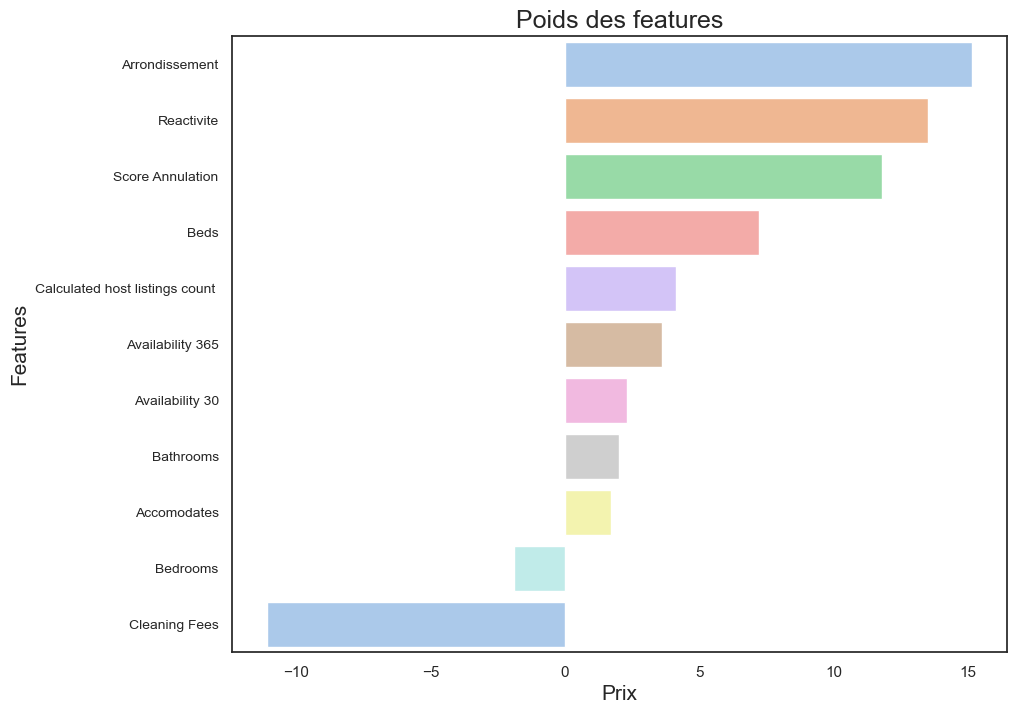

In [97]:

x_values = [x[0] for x in improvements]
y_values = [y[1] for y in improvements]

xtick_list = ['Arrondissement', 'Reactivite', 'Score Annulation', 'Beds', 'Calculated host listings count ', 'Availability 365', 'Availability 30', 'Bathrooms', 'Accomodates', 'Bedrooms', 'Cleaning Fees']
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=x_values, y=y_values, palette=("pastel"))
#ax.set(xticks=xtick_list)
ax.set_title('Poids des features', size=18)
ax.set_xlabel('Prix', size=15)
ax.set_yticklabels(xtick_list, size=10)
ax.set_ylabel('Features', size=15)
plt.savefig('features', bbox_inches ='tight', dpi = 400)

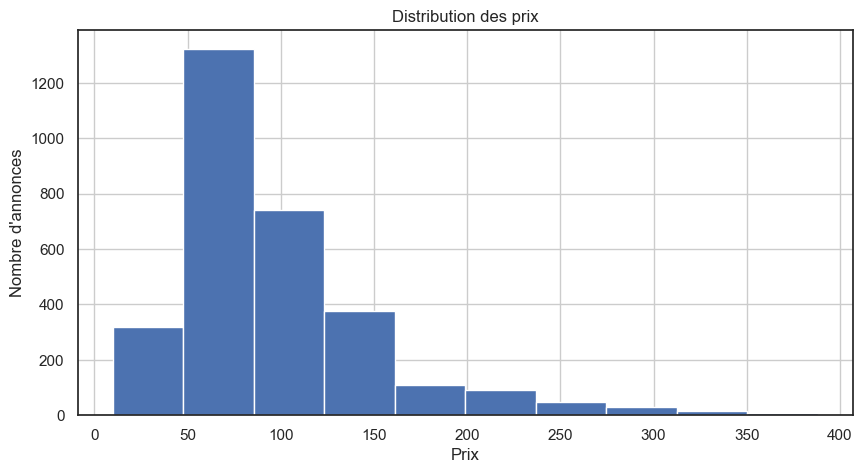

In [98]:
fig, ax = plt.subplots(figsize=(10,5)) 
model1['Price'].hist()
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel("Nombre d'annonces");

plt.savefig('Price', bbox_inches ='tight', dpi = 400)

### XGBoost

In [99]:
eval_set = [(X_val, y_val)]

In [100]:
gbm = xgb.XGBRegressor( 
                       n_estimators=10000, #arbitrary large number
                       max_depth=7,
                       objective="reg:squarederror",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.6
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go

xgb_reg = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='mae',
                    early_stopping_rounds=20,
                    verbose=100 #gives output log as below
                   )

[0]	validation_0-mae:87.70766	validation_1-mae:85.23394
[59]	validation_0-mae:11.71323	validation_1-mae:22.45995


In [101]:
test_pred = xgb_reg.predict(X_test)
print('Test MAE:', round(mean_absolute_error(y_test, test_pred),4))

Test MAE: 22.7154


### GridSearchCV for Best Parameters

In [102]:
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1],
    'n_estimators': [1000],
    'colsample_bytree':[0.5,0.75],
    'colsample_bylevel':[0.25,0.5],  
}

xgb_gridsearch = GridSearchCV(xgb.XGBRegressor(),
                           xgb_param_grid,
                           cv=5,
                           n_jobs=-1)

xgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [103]:
best_xgb = xgb_gridsearch.best_estimator_

In [104]:
test_pred = best_xgb.predict(X_test)
print('Test MAE:', round(mean_absolute_error(y_test, test_pred),4))

Test MAE: 23.1729


In [105]:
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.25, colsample_bynode=1, colsample_bytree=0.75,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [106]:
pickle.dump(best_xgb, open("best_xgb_model.pkl", "wb"))

In [107]:
feat_df = pd.DataFrame(list(zip(X_train.columns, best_xgb.feature_importances_)), 
                       columns=['Feature', 'Weight'])

In [108]:
feat_df = feat_df.sort_values(by=['Weight'], ascending=False)

In [109]:
top_10 = feat_df.head(10)

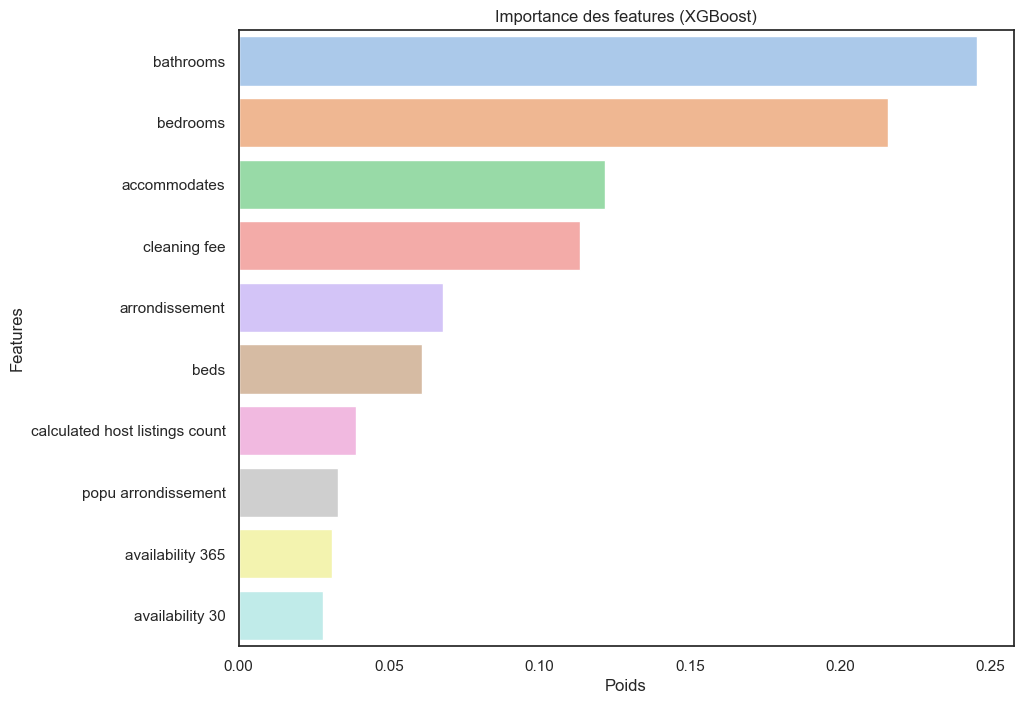

In [110]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=top_10['Weight'], y=top_10['Feature'], palette = "pastel")
plt.xlabel('Poids')
plt.ylabel('Features')
ax.set_title('Importance des features (XGBoost)');

In [111]:
shap.initjs()
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train)

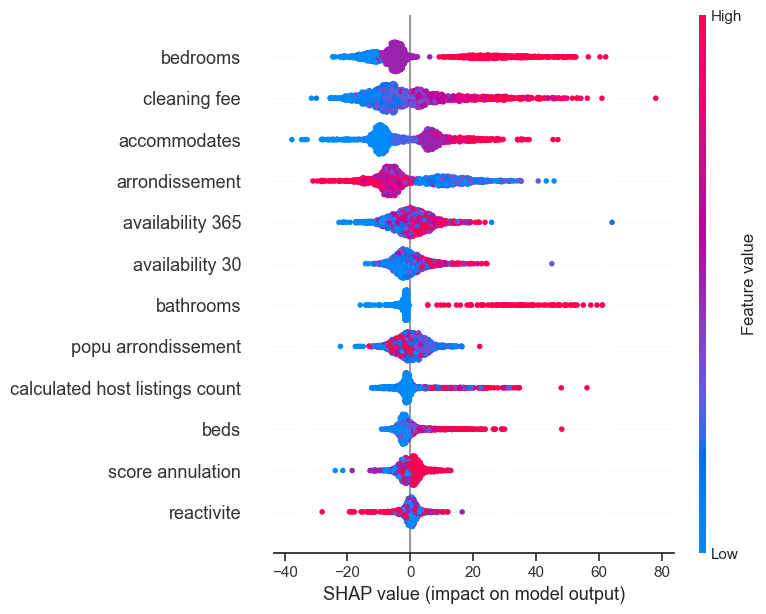

In [112]:
shap.summary_plot(shap_values, X_train,max_display=30)

In [113]:
shap.force_plot(explainer.expected_value, shap_values[113,:], X_test.iloc[10,:]) 

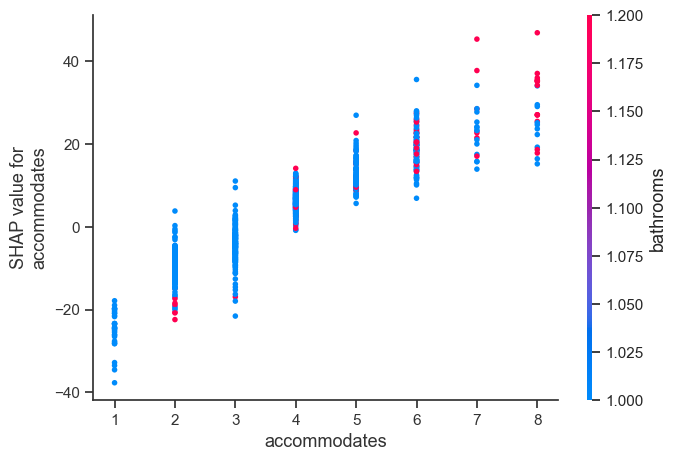

In [114]:
shap.dependence_plot("accommodates", shap_values, X_train)


In [115]:
X_display, y_display = shap.datasets.adult(display=True)

In [116]:
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: 97.75344848632812


In [117]:
select = range(20,50)
features = X_test.iloc[select]
features_display = X_test.iloc[select]

In [118]:
shap_values = explainer.shap_values(features)[1]

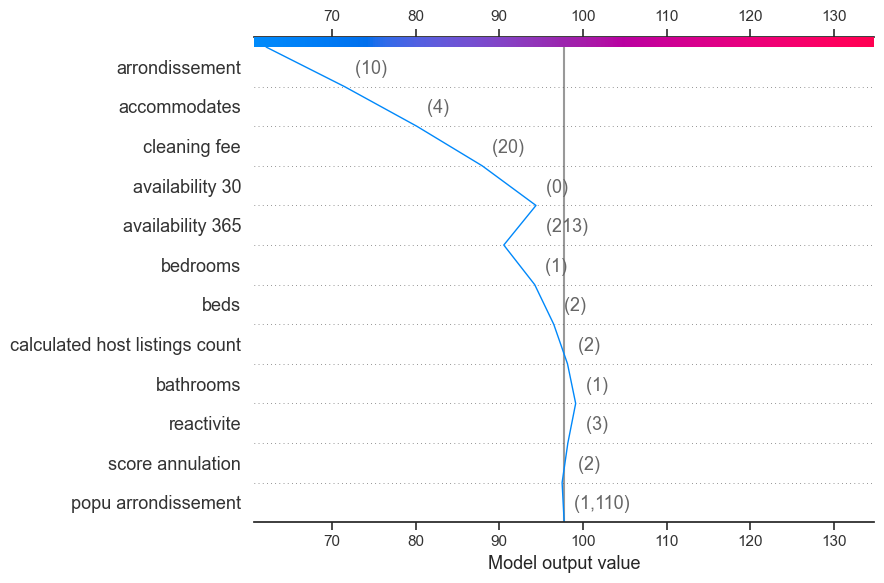

In [119]:
shap.decision_plot(expected_value, shap_values, features_display)

In [120]:

df['Amenities'].describe()


count                                                 15508
unique                                                13077
top       TV,Cable TV,Internet,Wireless Internet,Kitchen...
freq                                                     33
Name: Amenities, dtype: object

Un premier problème apparaît lorsque l'on essaye d'exploiter la variable « amenities » : tous les équipements en question sont groupés en format texte pour chaque observation. Ainsi, pour chaque observation, on aimerait dans un premier temps créer une variable différente pour chaque équipement. Puis, dans un second temps, créer des indicatrices pour chaque variable.

In [121]:
# On commence par convertir la variable en format string 
df = df.astype({'Amenities' : 'string'})

In [122]:
# On sépare ensuite chacun des équipements pour chaque observation

def indic_amenities(s):
    return len(s.split(','))

df['num_Amenities'] = df['Amenities'].apply(indic_amenities)

In [123]:
Amenities = " ".join(list(df.Amenities))
Amenities = Amenities.replace('{', '')
Amenities = Amenities.replace('}', ',')
Amenities = Amenities.replace('"', '')
amenities_split = [x.strip() for x in Amenities.split(',')]
amenities_split = set(amenities_split)
amenities_tr = list(amenities_split)
amenities_tr

for k in amenities_tr :
    df[k] = df['Amenities'].str.contains(k).astype(int)


print(df.shape)


amenities_tr

(15508, 286)


['Crib',
 'Buzzer/wireless intercom',
 '24-hour check-in Internet',
 'Stair gates',
 'Children’s books and toys TV',
 'Essentials Internet',
 'Washer Wireless Internet',
 'Dryer Internet',
 'Smoke detector Cable TV',
 'Lockbox Cable TV',
 'Smartlock',
 'Washer',
 'Essentials Heating',
 'translation missing: en.hosting_amenity_50 Family/kid friendly Wireless Internet',
 'Laptop friendly workspace Smoke detector',
 'Children’s books and toys',
 'Private living room',
 'Private entrance',
 'translation missing: en.hosting_amenity_50 Elevator in building',
 'Keypad Internet',
 'Cat(s)',
 'Heating',
 'translation missing: en.hosting_amenity_50 Kitchen',
 'Lockbox Wireless Internet',
 'Carbon monoxide detector Internet',
 'Hangers',
 'Shampoo Internet',
 'Dryer TV',
 'High chair Wireless Internet',
 'Children’s dinnerware Internet',
 'Suitable for events',
 'Safety card',
 'Elevator in building TV',
 'Pack ’n Play/travel crib TV',
 'Doorman Entry Wheelchair accessible',
 'translation missing

On obtient dès lors une liste d'éléments qui correspondent chacun à un équipement spécifique. Comme on va le vérifier juste après, ces variables sont désormais quantitatives : ce sont des indicatrices. 


In [124]:
amenities_df = df.iloc[:,-10000:]
amenities_df['Price'] = df['Price']

In [125]:
amenities_df[['Internet', 'TV', 'Cable TV', 'Heating', 'Kitchen', 'Washer', 'Elevator in building']].head()

Internet  TV  Cable TV  Heating  Kitchen  Washer  Elevator in building
0          1   1         1        1        1       0                     0
8          1   1         0        1        1       1                     0
16         1   1         1        1        1       1                     0
19         1   1         1        1        1       1                     0
33         1   0         0        1        0       0                     0

Par exemple, on peut s'intéresser à l'influence du fait de posséder (ou non) les chaînes de télévision de la TNT sur le prix moyen de la nuit. 

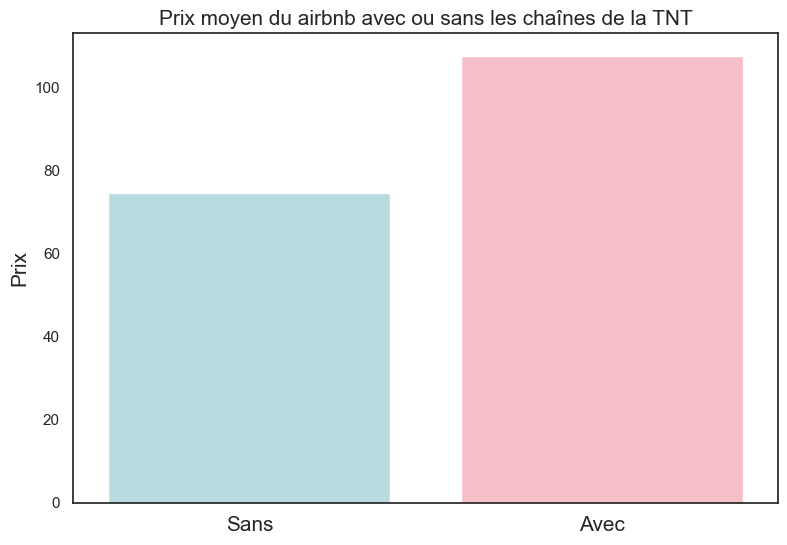

In [134]:
index = 1
fig = plt.figure(1, figsize=(20,50))
internet_amenities = amenities_tr[11:12]
colors = ['powderblue','lightpink']
for name in internet_amenities:
    
    current_axis = fig.add_subplot(1,2,index)
    pmoy0 = df[df[name] == 0]['Price'].mean()
    pmoy1 = df[df[name] == 1]['Price'].mean()

    x = ['Sans', 'Avec']
    y = [pmoy0, pmoy1]

    ax = sns.barplot(x=x,y=y, palette=colors);
    title = 'Prix moyen du airbnb avec ou sans les chaînes de la TNT' 
    ax.set_title(title, size=15)
    ax.set_xticklabels(['Sans', 'Avec'], size=15)
    ax.set_ylabel('Prix', size = 15)
    index +=1

Le résultat obtenu est certes qualitatif, mais il nous donne un premier aperçu de ce qui peut nous sembler assez intuitif : les logements les mieux équipés (ici, équipés d'une offre de chaînes de télévision) sont tendanciellement plus chers. Néanmoins, ces seules statistiques descriptives ne nous permettent pas de déterminer la significativité statistique du résultat. Pour ce faire, il faudrait de nouveau utiliser la modélisation de la partie précédente en intégrant tous les nouveaux éléments relatifs aux équipements. Certains écueils restent toutefois à éviter. En particulier, il faut faire attention à ne pas trop « surcharger » les modèles de régression standards, au risque d'induire des biais liés à l'overfitting. Dans ce cas là, les méthodes de régressions pénalisées (Lasso, Ridge) ou celles de gradient boosting (XGBoost) sont préférables. 